In [3]:
using DifferentialEquations

In [67]:
function lotka_volterra(du,u,p,t)
  x, y = u
  α, β, δ, γ = p
  du[1] = dx = α*x - β*x*y
  du[2] = dy = -δ*y + γ*x*y
end
u0 = [1.0,1.0]
tspan = (0.0,10.0)
p = [1.5,1.0,3.0,1.0]
prob = ODEProblem(lotka_volterra,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [1.0, 1.0]

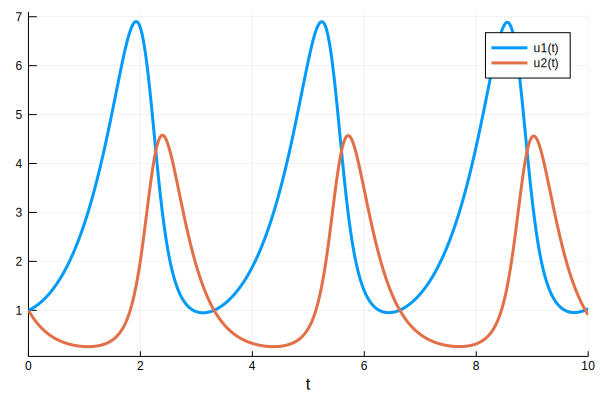

In [68]:
sol = solve(prob)
using Plots
plot(sol)

In [69]:
u0_f(p,t0) = [p[2],p[4]]
tspan_f(p) = (0.0,10*p[4])
p = [1.5,1.0,3.0,1.0]
prob = ODEProblem(lotka_volterra,u0_f,tspan_f,p)

ODEProblem with uType typeof(u0_f) and tType Unknown. In-place: true
timespan: tspan_f
u0: u0_f

In [70]:
p = [1.5,1.0,3.0,1.0]
prob = ODEProblem(lotka_volterra,u0,tspan,p)
sol = solve(prob,Tsit5(),saveat=0.1)
A = sol[1,:] # length 101 vector

101-element Array{Float64,1}:
 1.0               
 1.061078067335908 
 1.1440276717258782
 1.2491712125752183
 1.377644570563968 
 1.5312308177460903
 1.7122697558182405
 1.9235782758146147
 2.1683910896557625
 2.450250667193591 
 2.7728223032630503
 3.139732989028239 
 3.553901355379044 
 ⋮                 
 4.346174014048462 
 3.246588351004504 
 2.3956673058318616
 1.8172829930057808
 1.4427616237534566
 1.2089082517194032
 1.0685926771516716
 0.9910229586625902
 0.9574212424898647
 0.9569792240829894
 0.9835607043310893
 1.033757885433893 

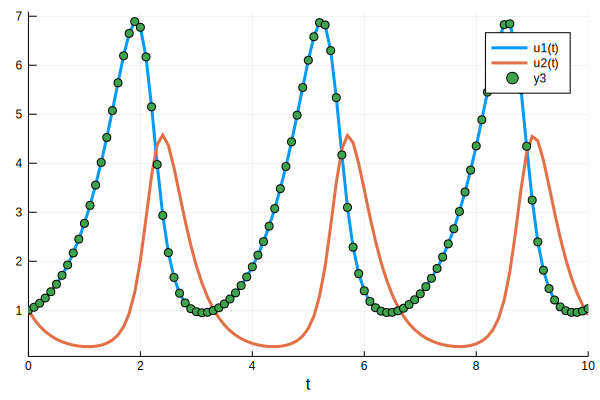

In [71]:
plot(sol)
t = 0:0.1:10.0
scatter!(t,A)

In [11]:
using Flux, DiffEqFlux
diffeq_rd(p,prob,Tsit5(),saveat=0.1)

┌ Info: Precompiling Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1186
┌ Info: Precompiling DiffEqFlux [aae7a2af-3d4f-5e19-a356-7da93b79d9d0]
└ @ Base loading.jl:1186


retcode: Success
Interpolation: 1st order linear
t: 101-element Array{Float64,1}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮  
  8.9
  9.0
  9.1
  9.2
  9.3
  9.4
  9.5
  9.6
  9.7
  9.8
  9.9
 10.0
u: 101-element Array{Array{Float64,1},1}:
 [1.0, 1.0]         
 [1.06108, 0.821084]
 [1.14403, 0.679053]
 [1.24917, 0.566893]
 [1.37764, 0.478813]
 [1.53123, 0.410156]
 [1.71227, 0.357265]
 [1.92358, 0.317347]
 [2.16839, 0.288389]
 [2.45025, 0.269054]
 [2.77282, 0.258724]
 [3.13973, 0.257497]
 [3.5539, 0.26645]  
 ⋮                  
 [4.34617, 4.2047]  
 [3.24659, 4.54693] 
 [2.39567, 4.45777] 
 [1.81728, 4.06495] 
 [1.44276, 3.53974] 
 [1.20891, 2.99146] 
 [1.06859, 2.48207] 
 [0.991023, 2.03725]
 [0.957421, 1.66321]
 [0.956979, 1.35559]
 [0.983561, 1.10629]
 [1.03376, 0.906371]

In [73]:
p = param([2.2, 1.0, 2.0, 0.4]) # Initial Parameter Vector
params = Flux.Params([p])

function predict_rd() # Our 1-layer neural network
  diffeq_rd(p,prob,Tsit5(),saveat=0.1)[1,:]
end

loss_rd() = sum(abs2,x-1 for x in predict_rd()) # loss function


loss_rd (generic function with 1 method)

4321.841474006289 (tracked)

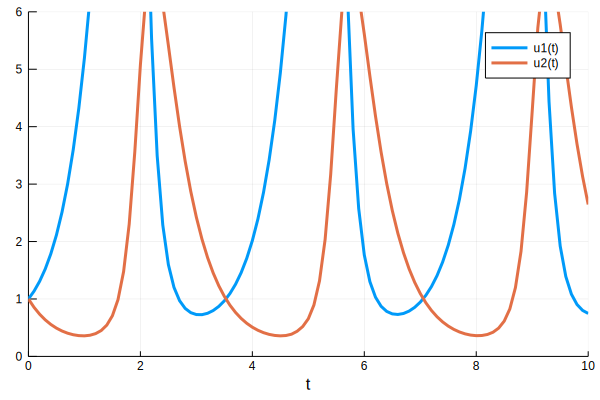

1973.1643807986304 (tracked)

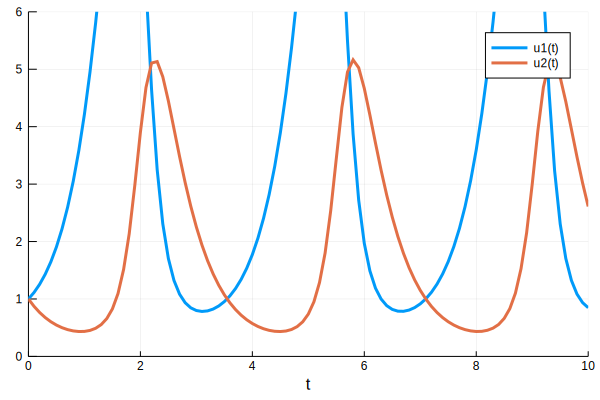

1017.7359783622961 (tracked)

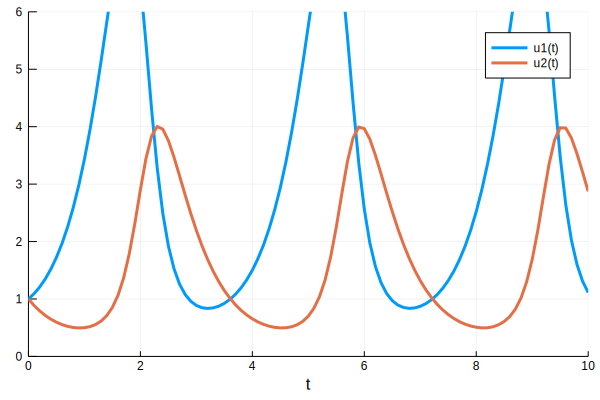

566.4996819985441 (tracked)

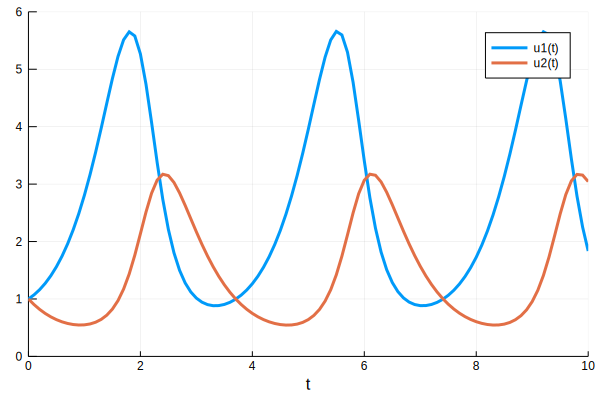

324.74514159780455 (tracked)

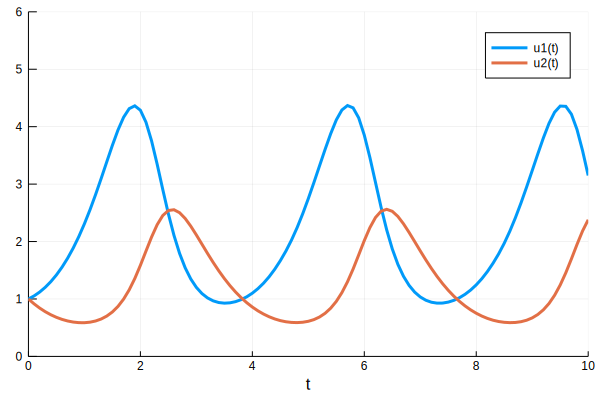

178.03951930475625 (tracked)

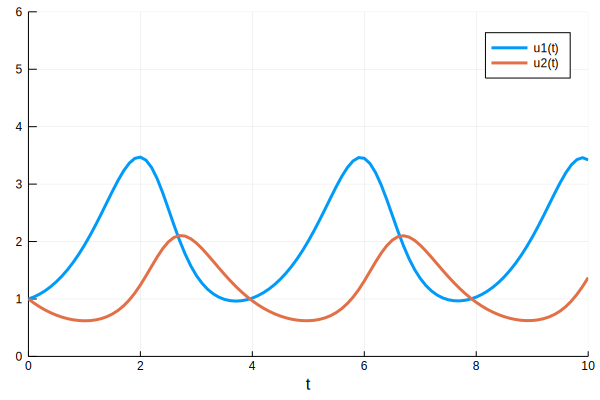

92.99791892168092 (tracked)

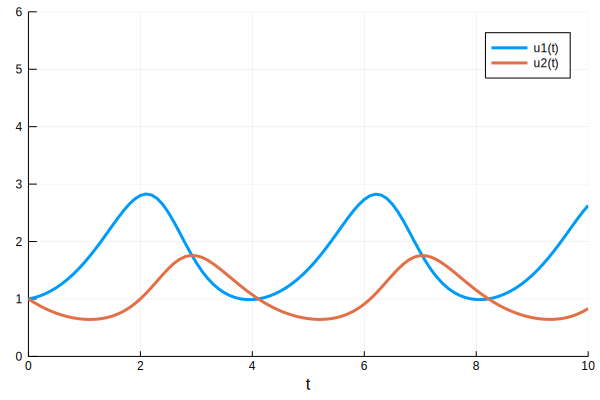

50.879436946443754 (tracked)

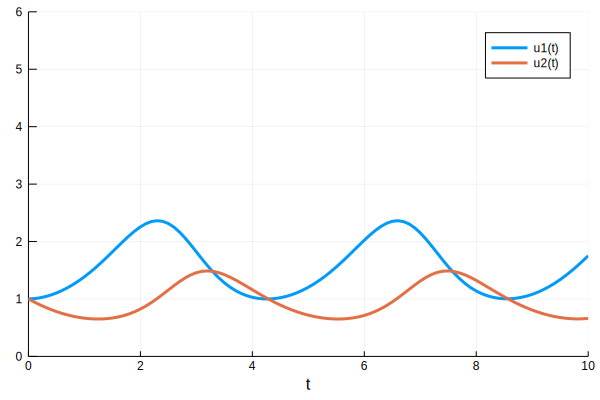

30.39219237521504 (tracked)

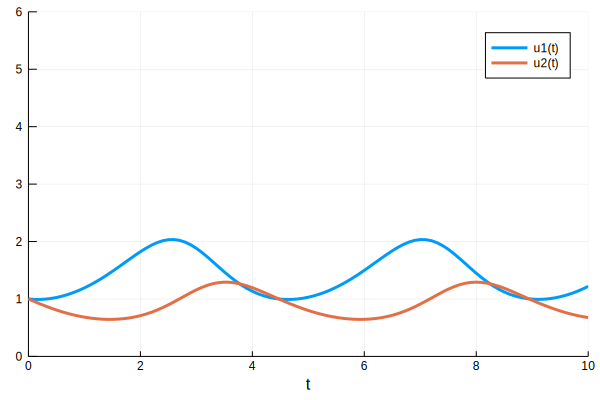

19.325514386755174 (tracked)

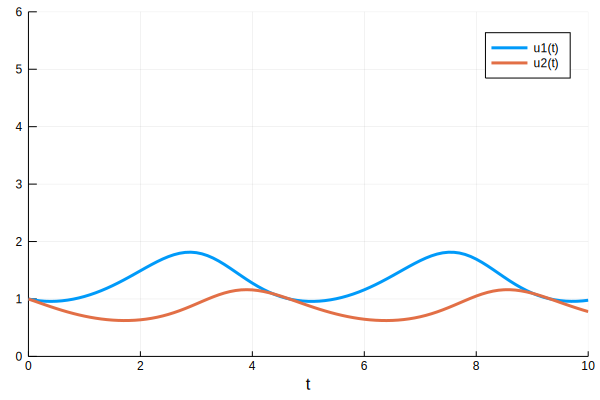

13.102137851781583 (tracked)

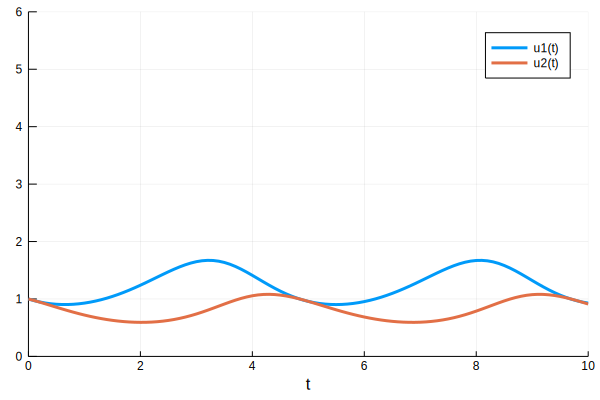

9.852027704213494 (tracked)

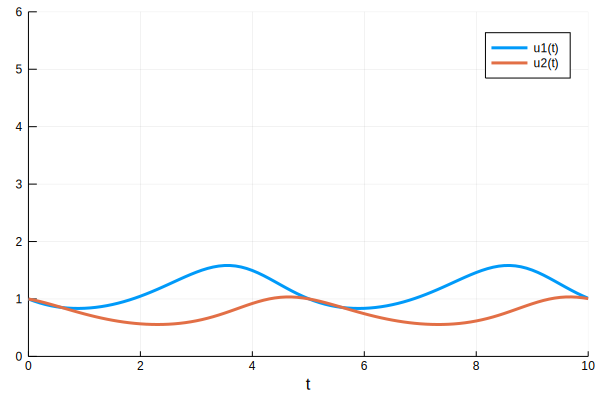

8.456098905373784 (tracked)

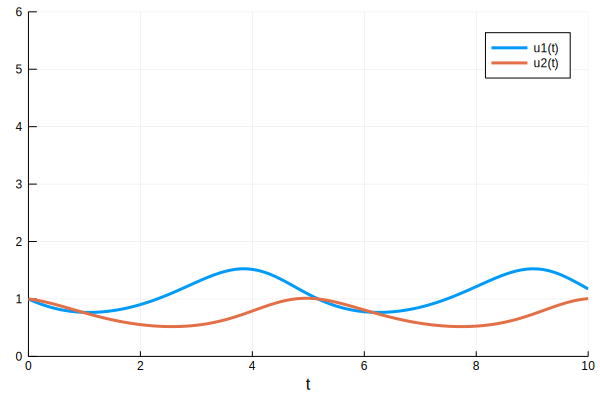

8.064185477569554 (tracked)

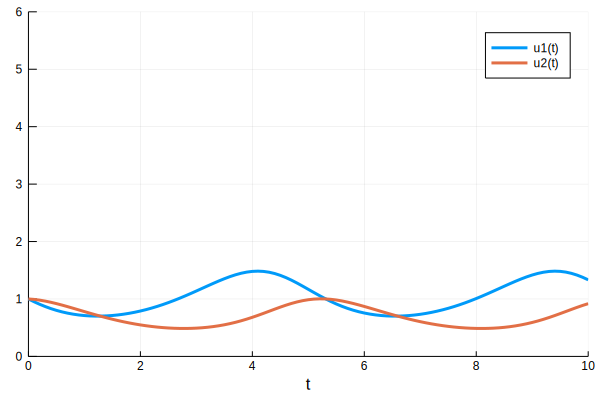

8.194296928911088 (tracked)

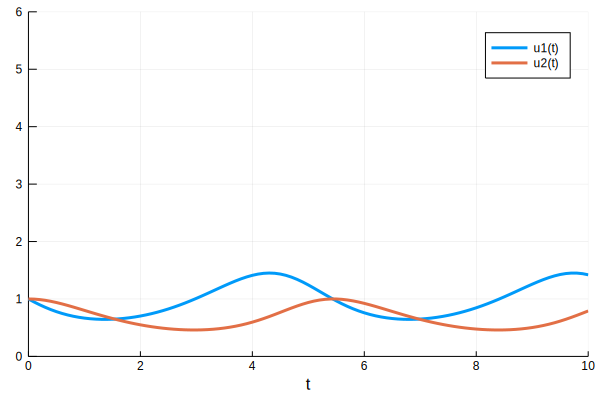

8.720996706700484 (tracked)

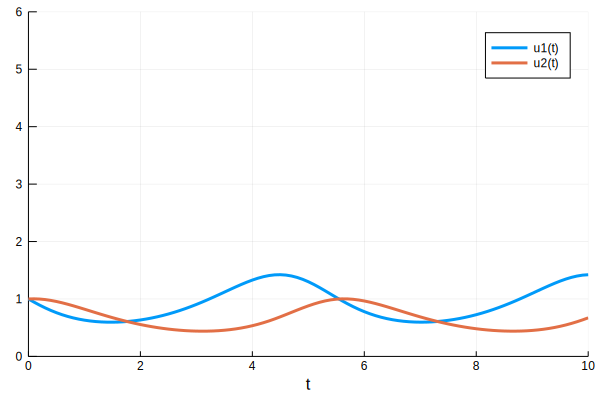

9.606060175934003 (tracked)

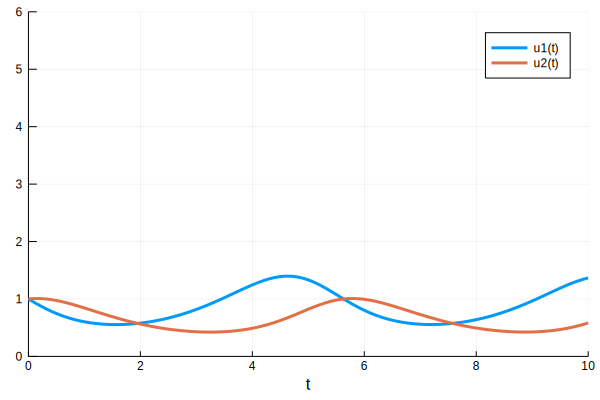

10.736968675650271 (tracked)

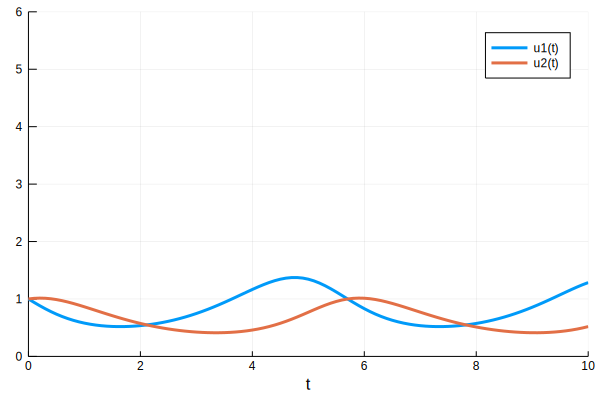

11.956497655418746 (tracked)

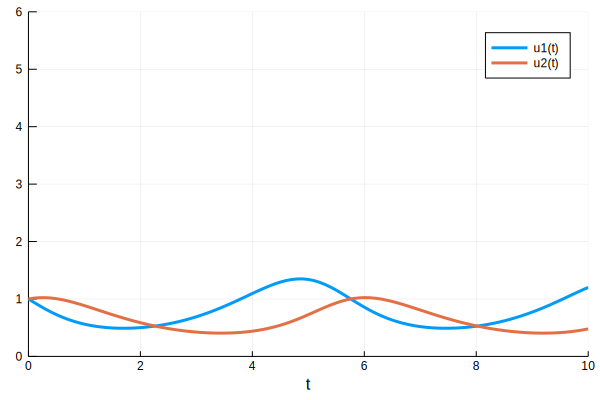

13.126780298905574 (tracked)

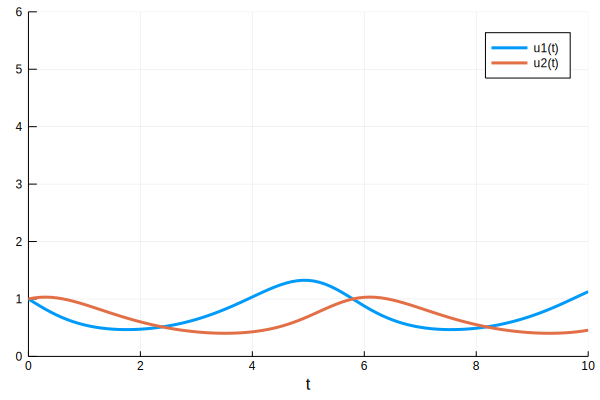

14.158889176202559 (tracked)

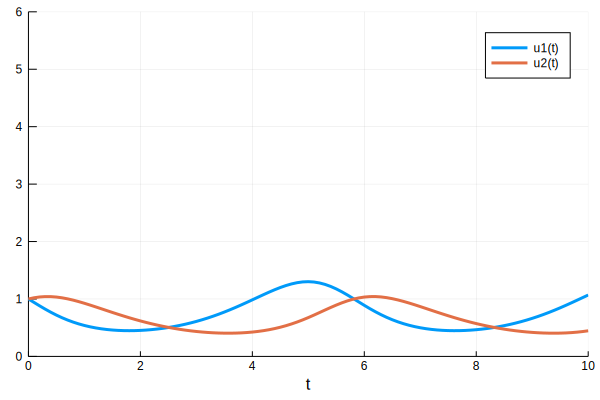

15.01103440154849 (tracked)

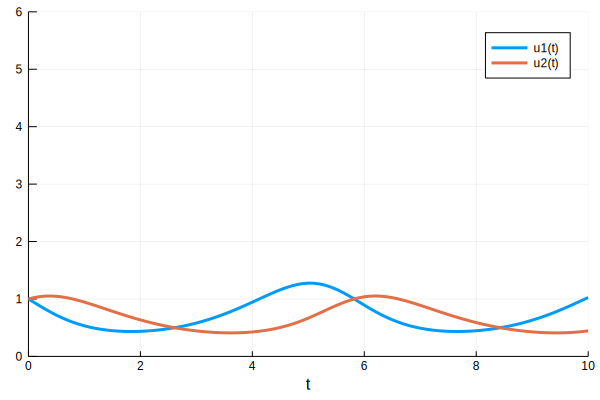

15.672218187816489 (tracked)

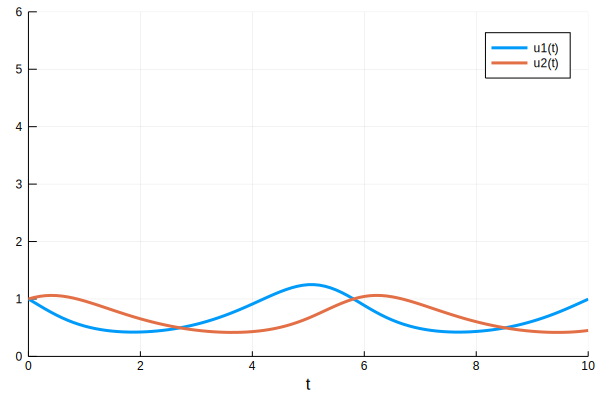

16.149507166394326 (tracked)

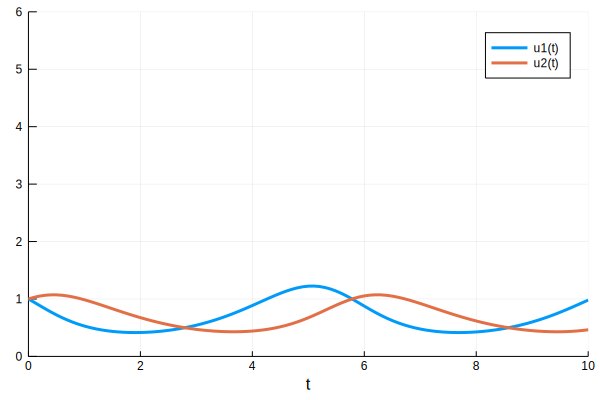

16.459645882827022 (tracked)

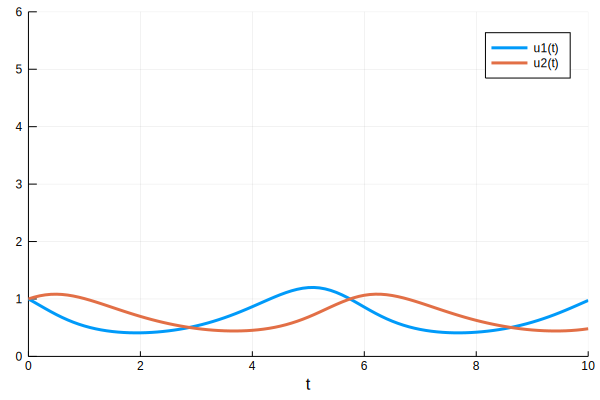

16.62334756678214 (tracked)

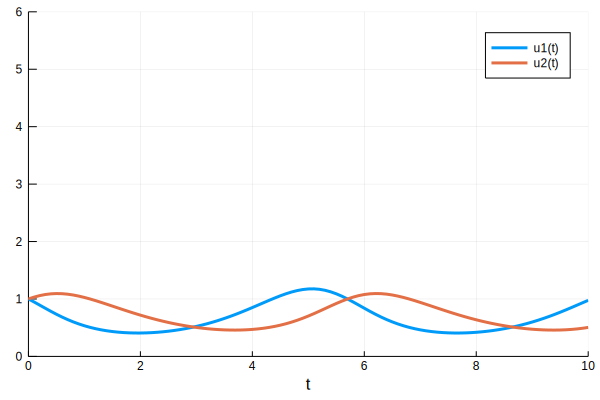

16.66161871922215 (tracked)

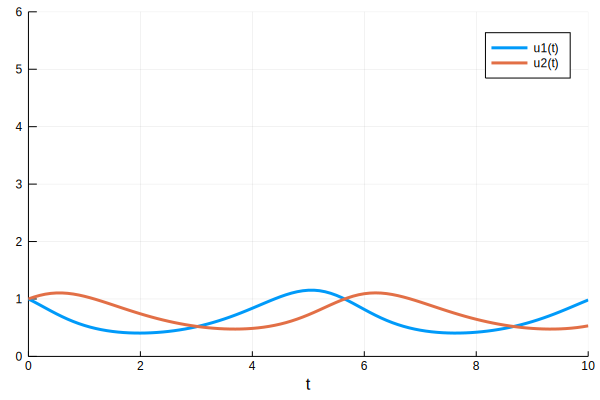

16.595408560330053 (tracked)

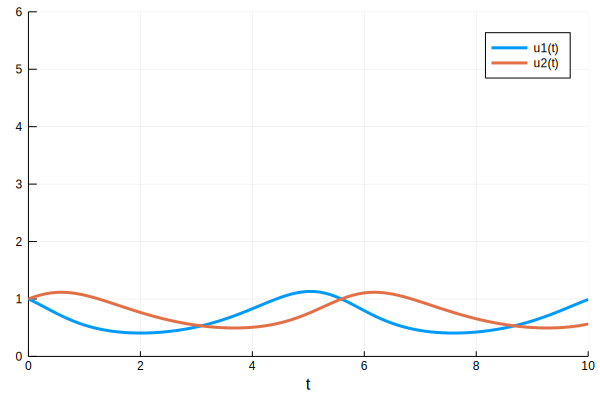

16.444170022270903 (tracked)

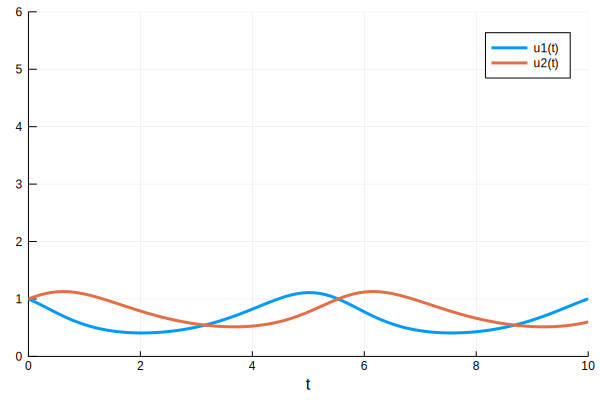

16.22566314689092 (tracked)

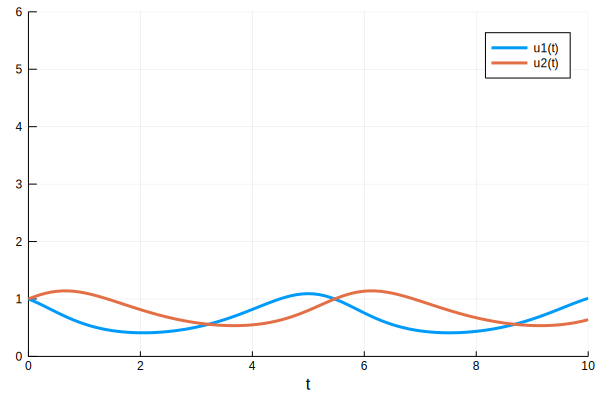

15.95529481666102 (tracked)

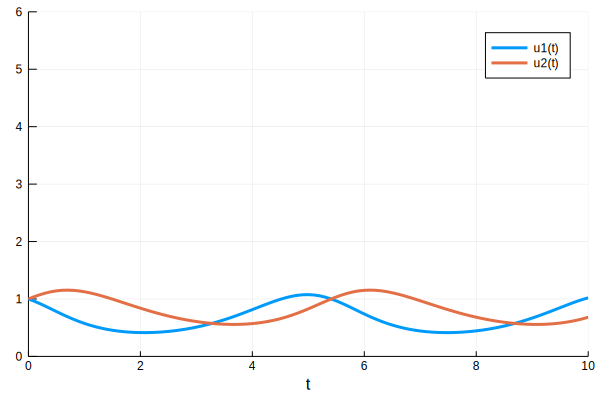

15.64604864876145 (tracked)

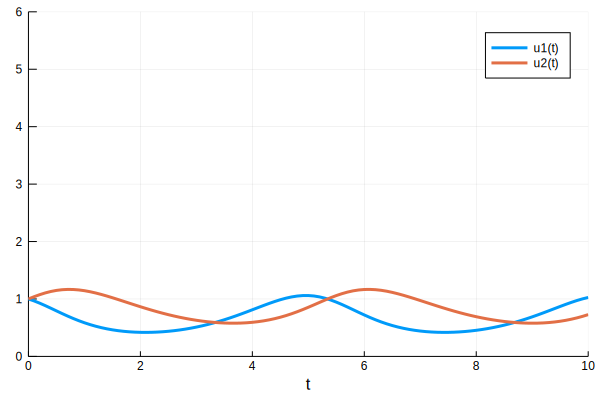

15.30860973599294 (tracked)

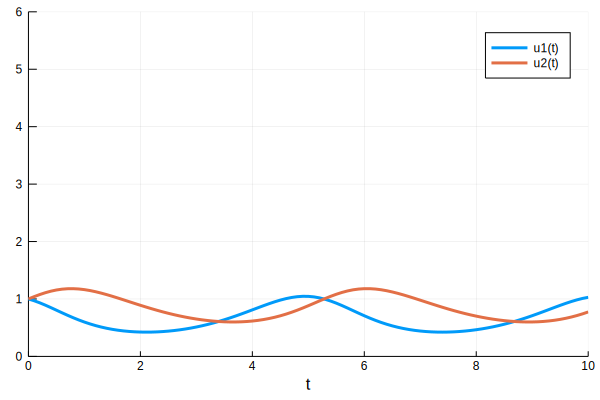

14.951525770036879 (tracked)

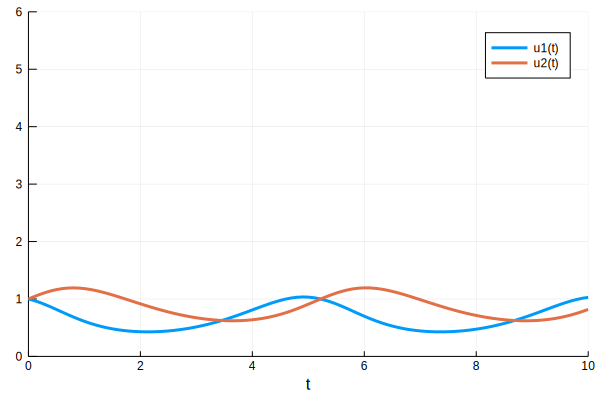

14.581523610600975 (tracked)

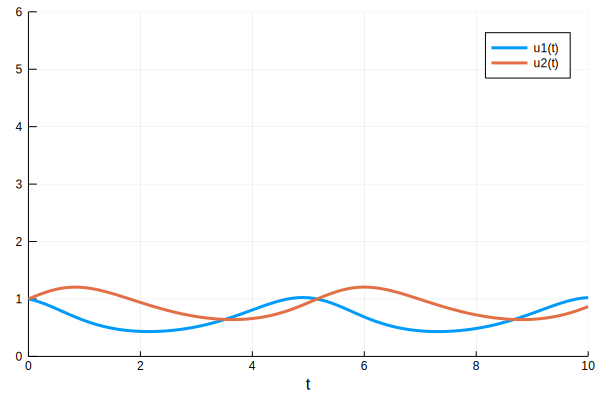

14.203925931898612 (tracked)

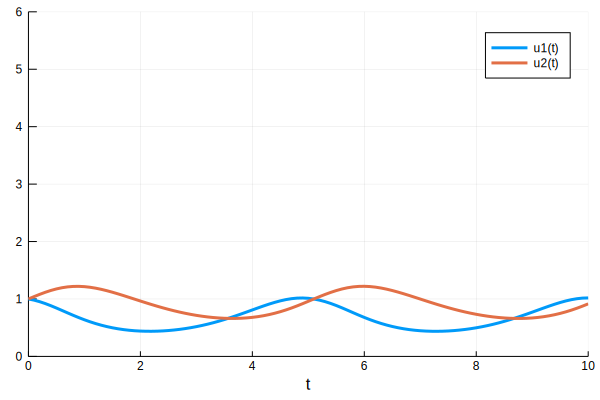

13.822799452031196 (tracked)

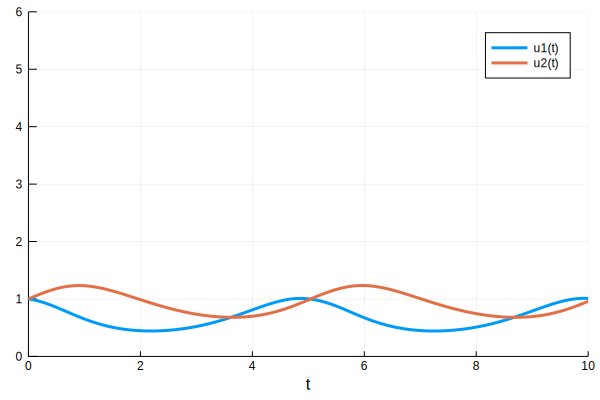

13.441147889599476 (tracked)

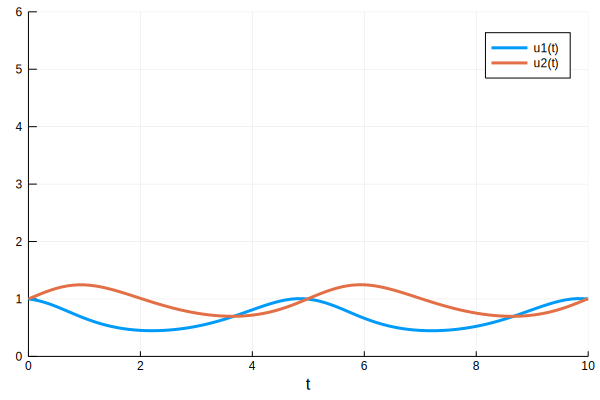

13.061126604904201 (tracked)

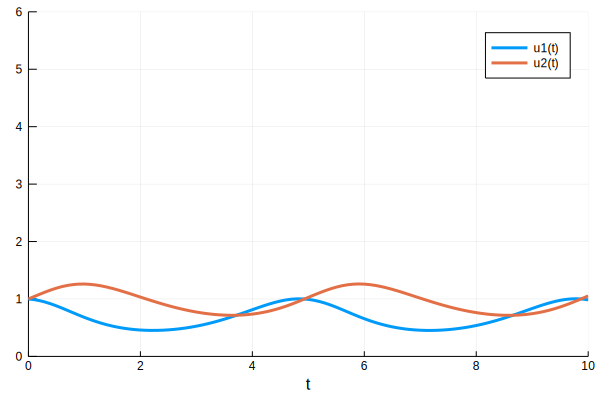

12.684364044538736 (tracked)

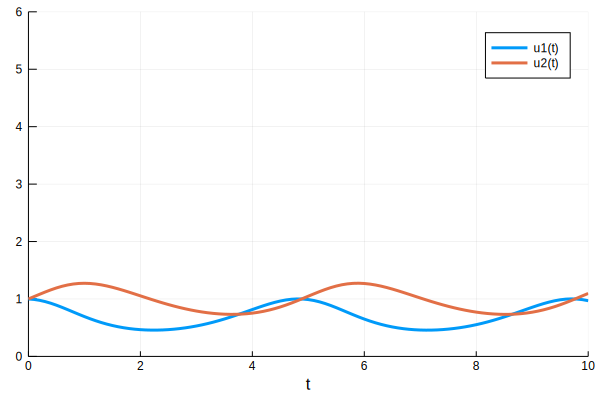

12.311954082436573 (tracked)

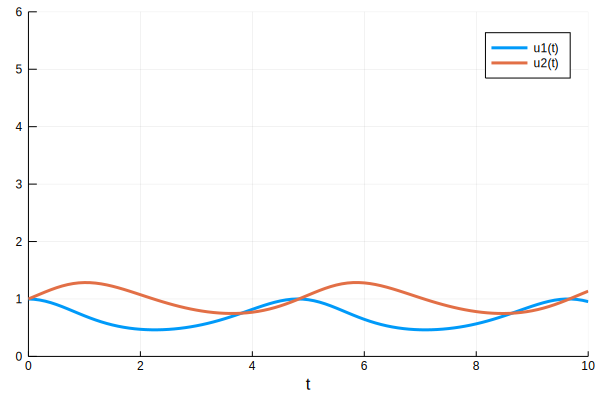

11.94458217431418 (tracked)

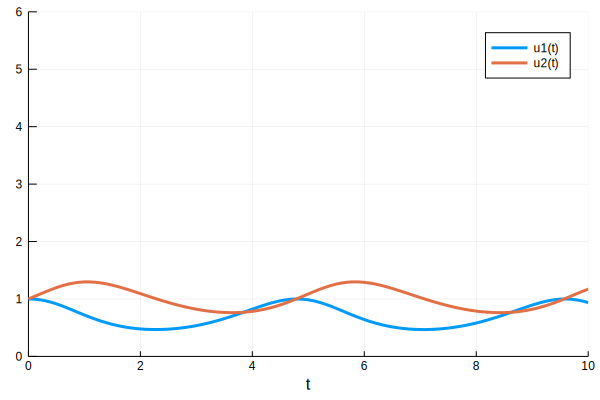

11.582617688364056 (tracked)

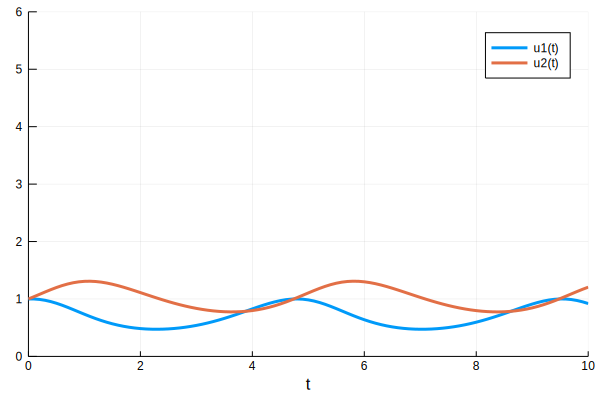

11.22633656120174 (tracked)

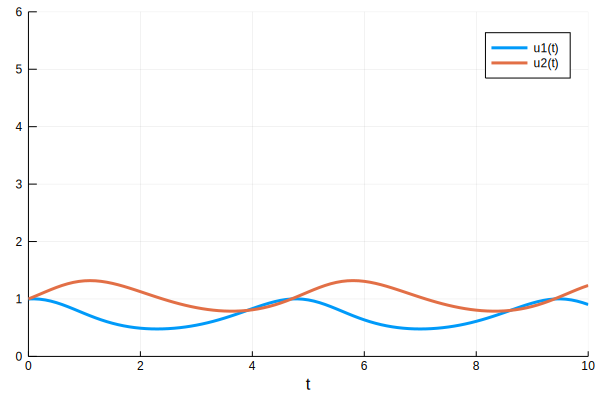

10.875852664296666 (tracked)

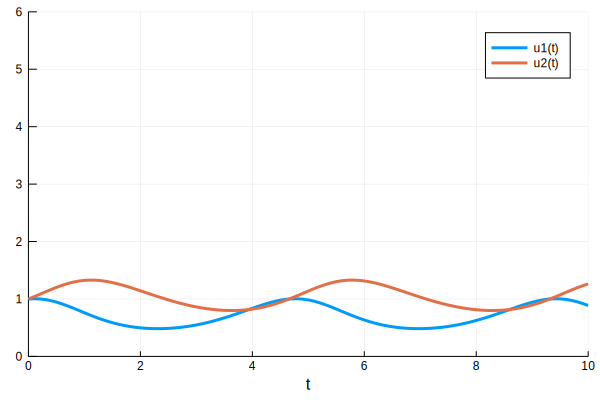

10.531076769049593 (tracked)

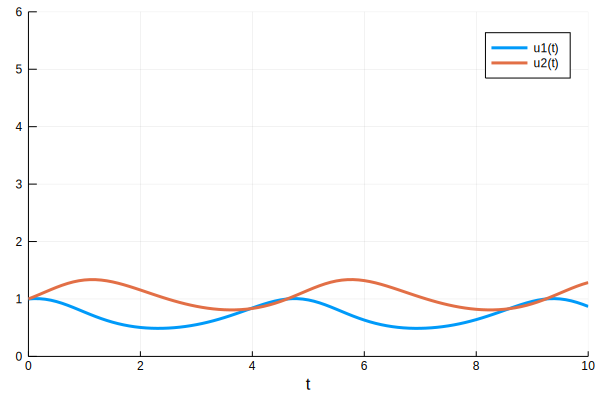

10.191832471188338 (tracked)

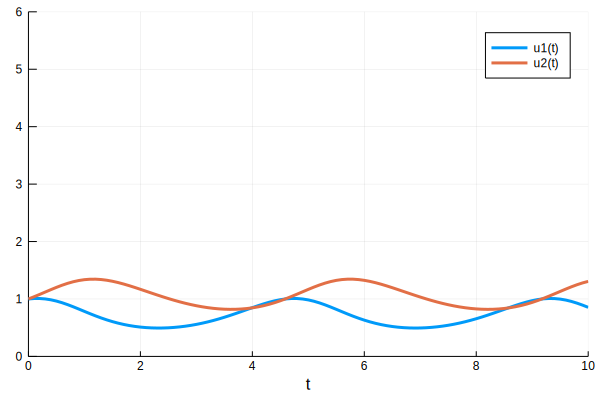

9.85785994059806 (tracked)

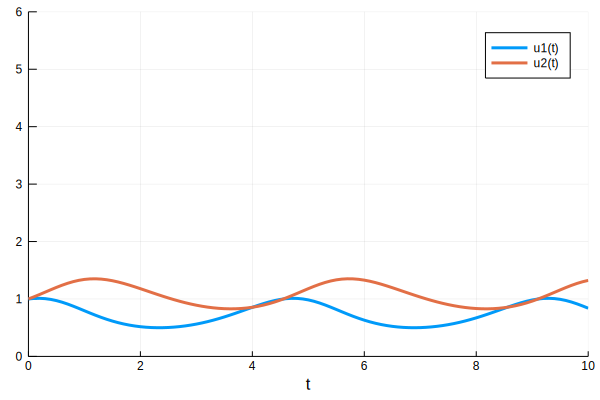

9.52883353771073 (tracked)

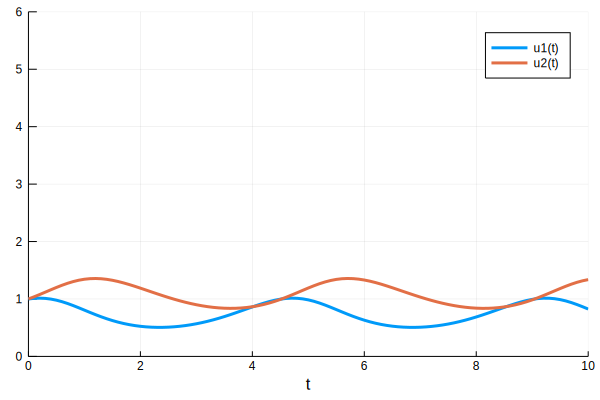

9.204414247954885 (tracked)

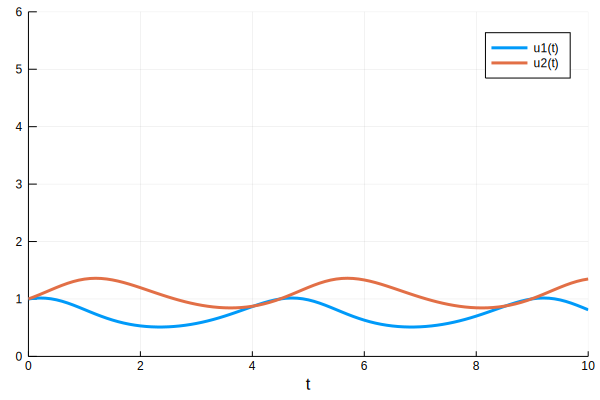

8.884186060018244 (tracked)

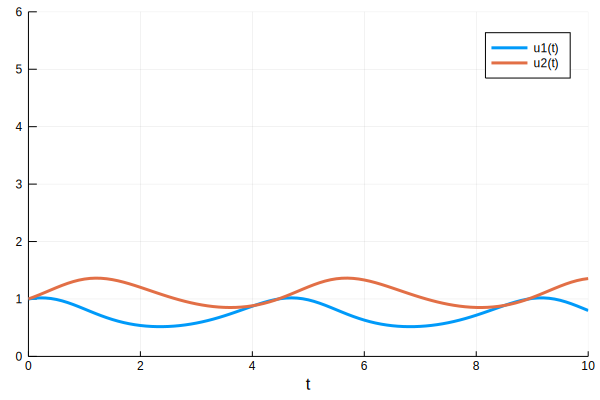

8.567765181483455 (tracked)

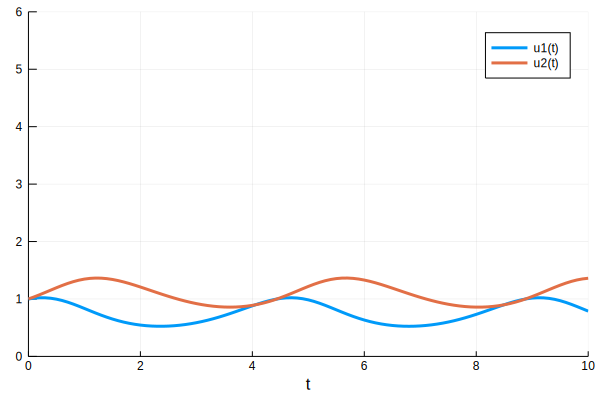

8.254801281380743 (tracked)

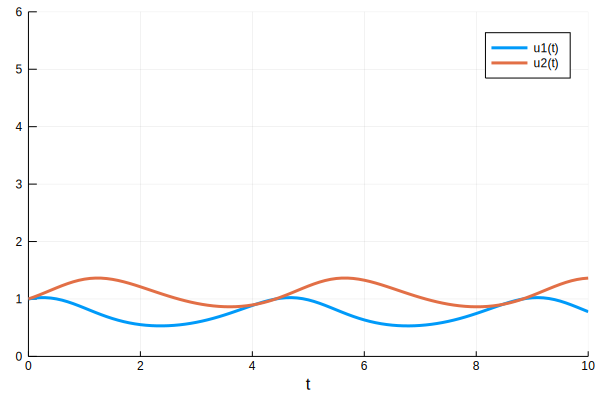

7.945007497190393 (tracked)

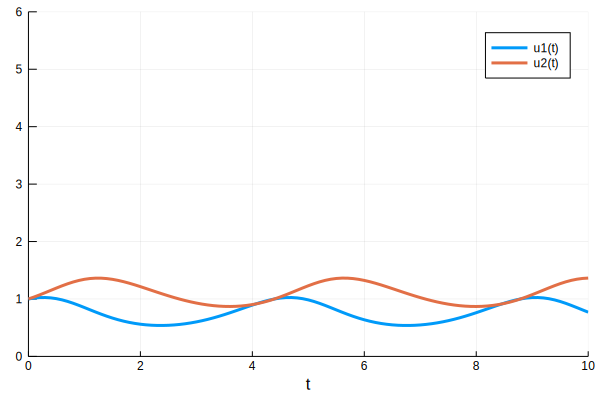

7.638195700656977 (tracked)

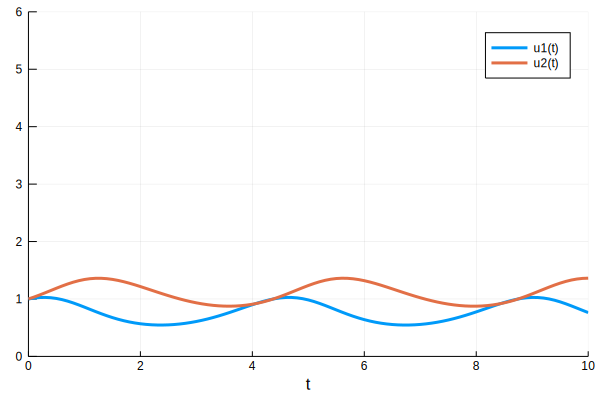

7.334262027680347 (tracked)

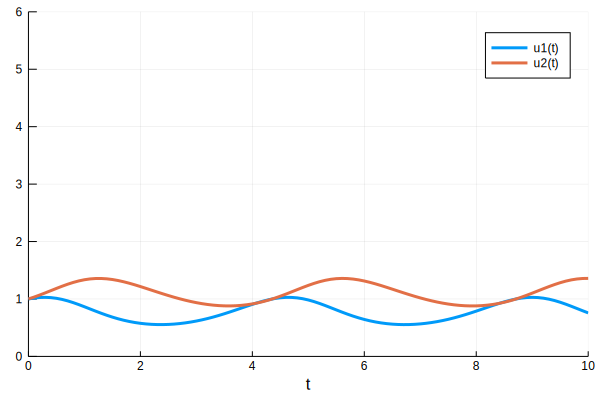

7.03321531897173 (tracked)

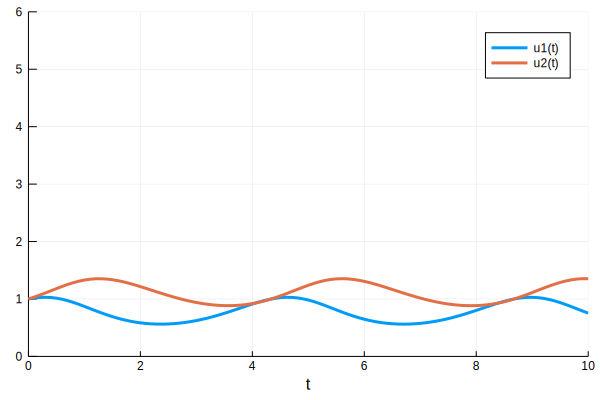

6.735181948877447 (tracked)

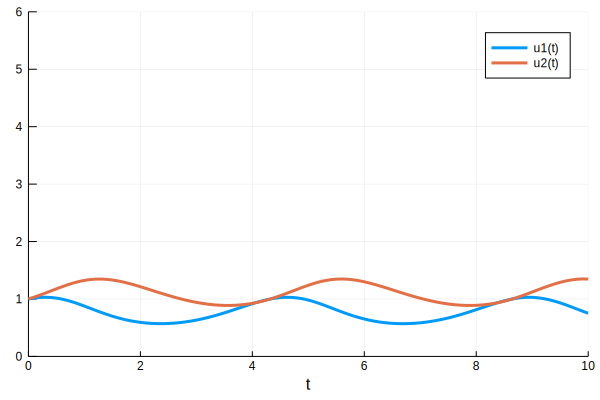

6.440392441571759 (tracked)

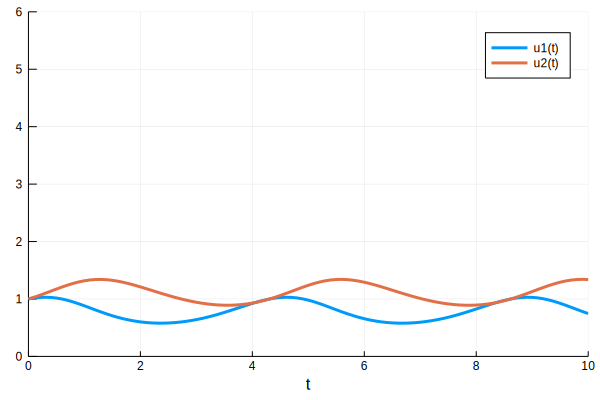

6.1491896112706765 (tracked)

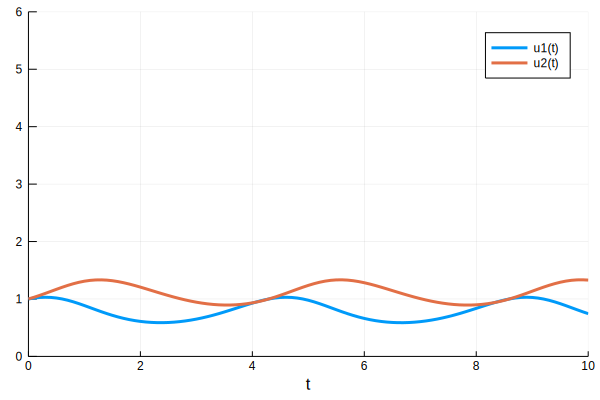

5.862001221085289 (tracked)

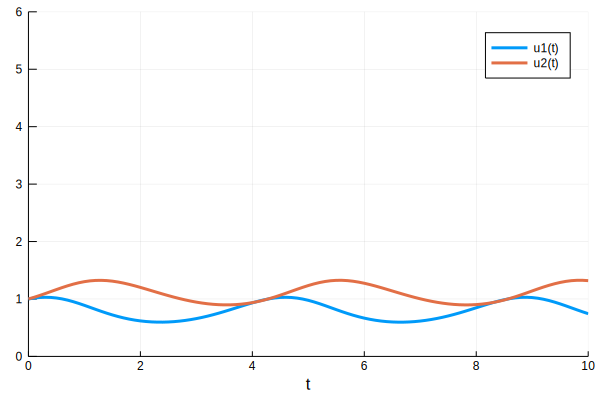

5.579350874095856 (tracked)

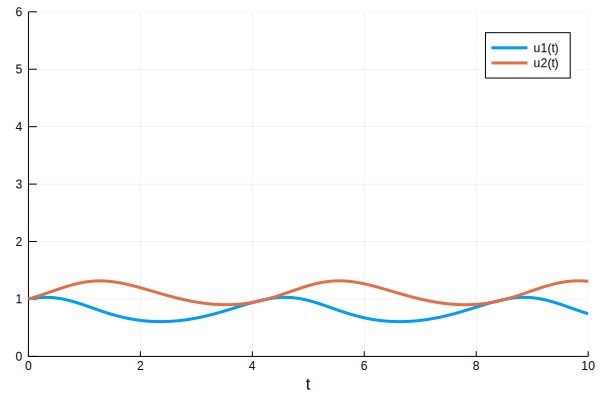

5.301815305985868 (tracked)

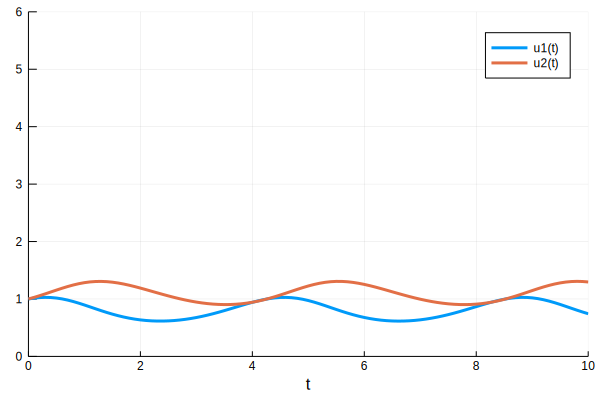

5.029987452206126 (tracked)

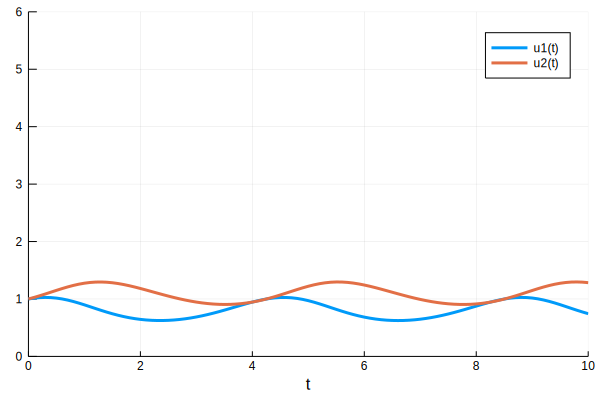

4.764473669149464 (tracked)

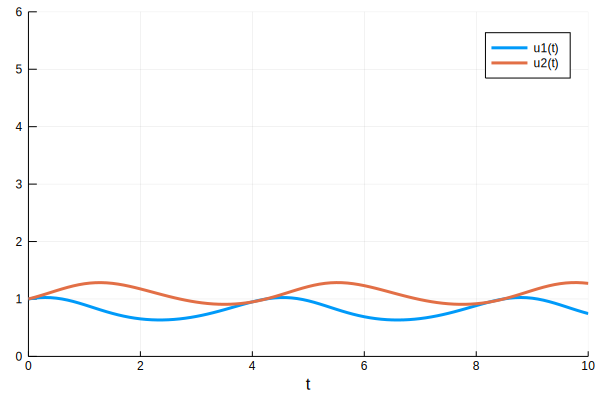

4.50588511161169 (tracked)

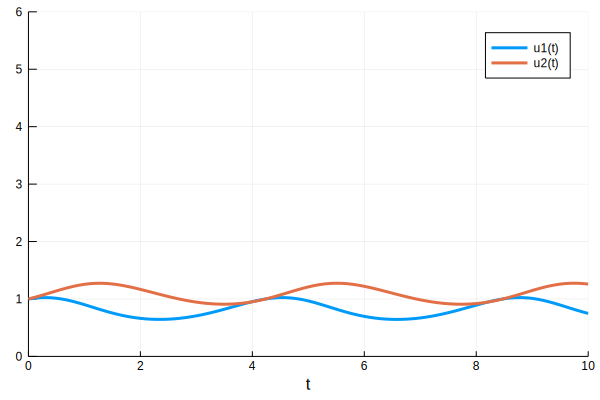

4.254773218568244 (tracked)

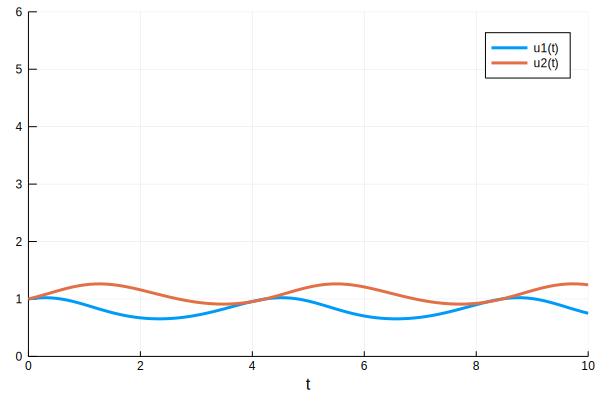

4.0116495618302626 (tracked)

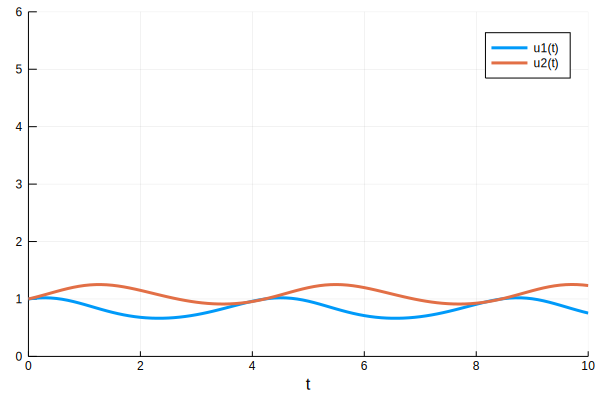

3.7769663270030525 (tracked)

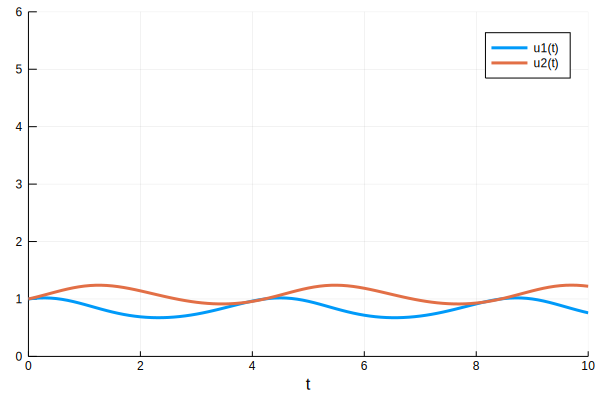

3.55107324256405 (tracked)

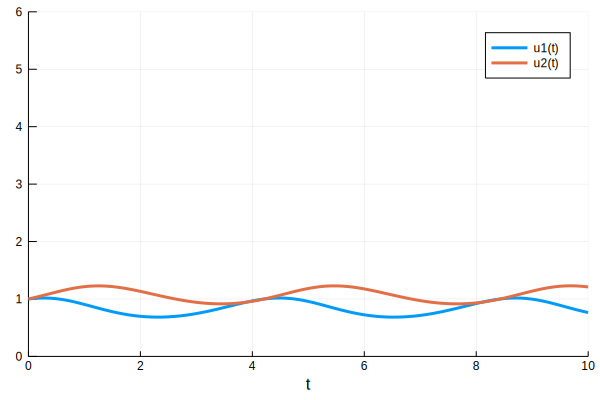

3.3342927835188445 (tracked)

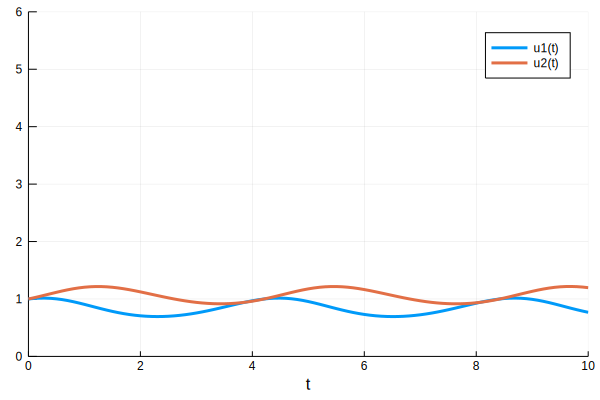

3.126848629854346 (tracked)

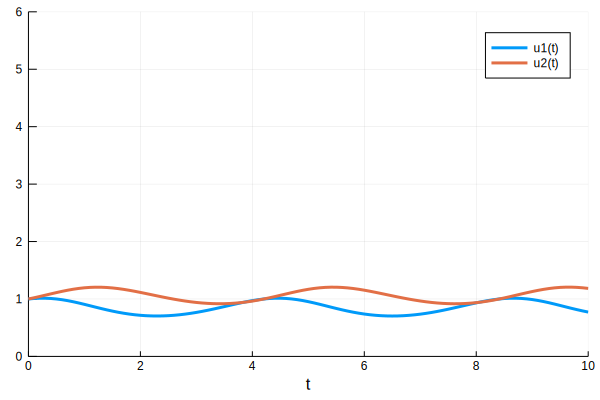

2.9288385411555895 (tracked)

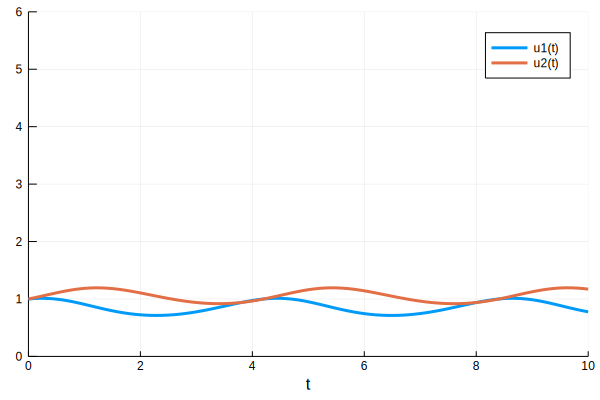

2.7403053454334816 (tracked)

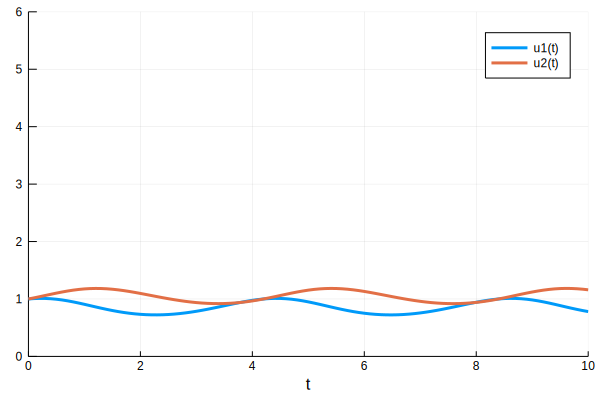

2.561202721775626 (tracked)

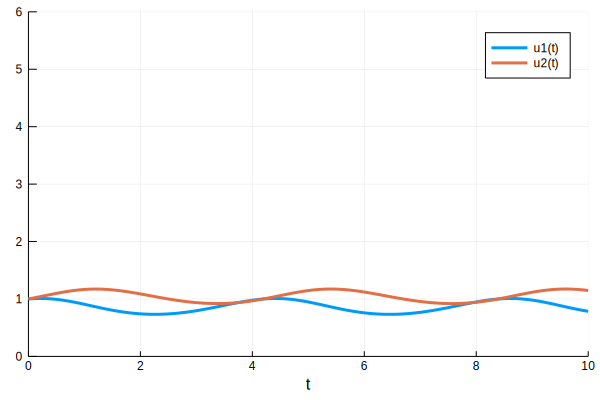

2.391399402915309 (tracked)

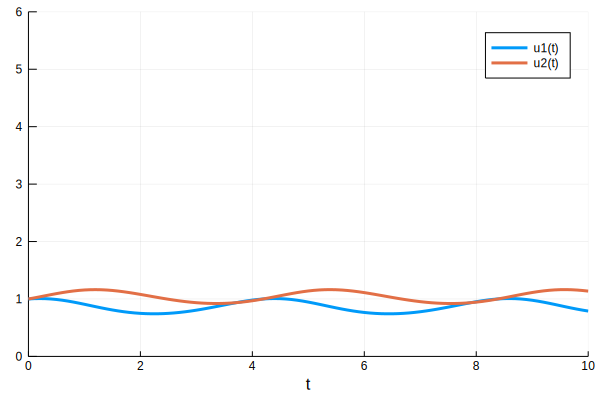

2.2306987058426238 (tracked)

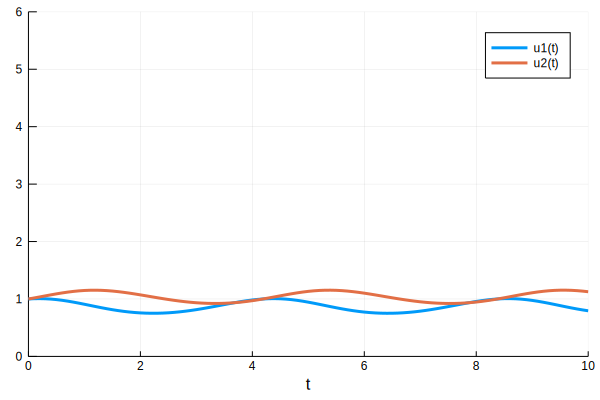

2.0788196918682824 (tracked)

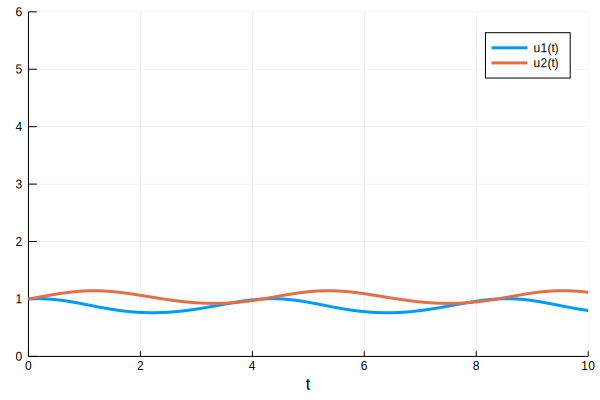

1.9354933276213049 (tracked)

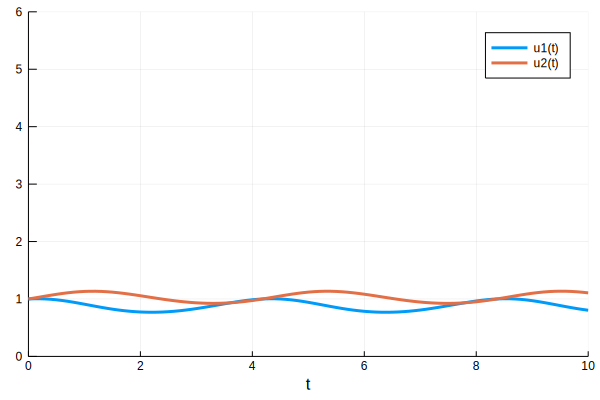

1.8003755120030174 (tracked)

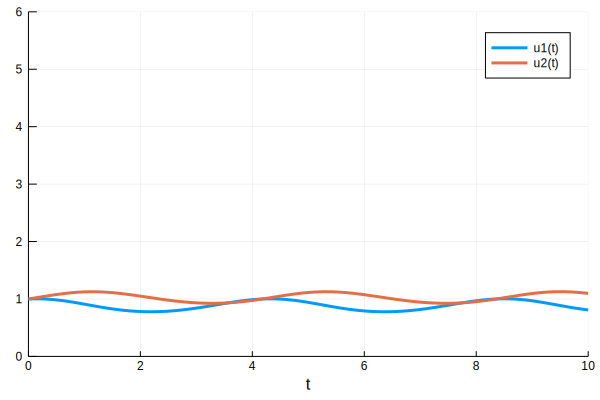

1.6730757348432412 (tracked)

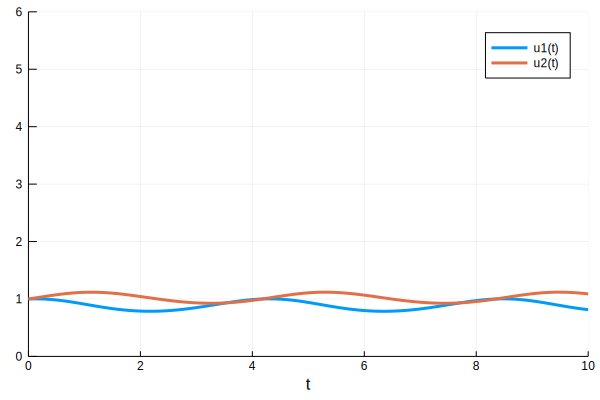

1.5531943610501802 (tracked)

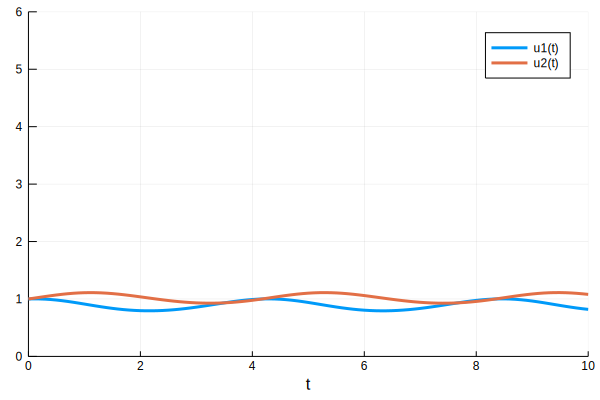

1.440357452224341 (tracked)

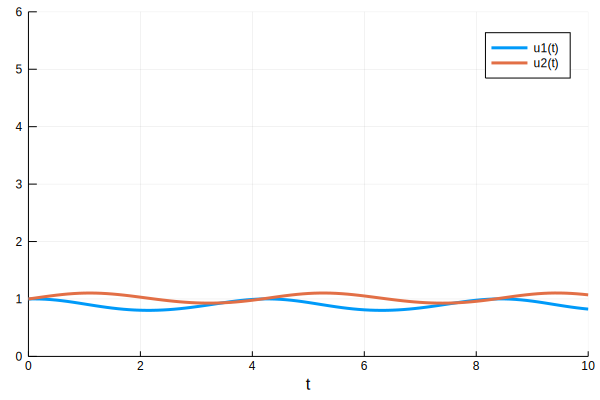

1.3341725080350773 (tracked)

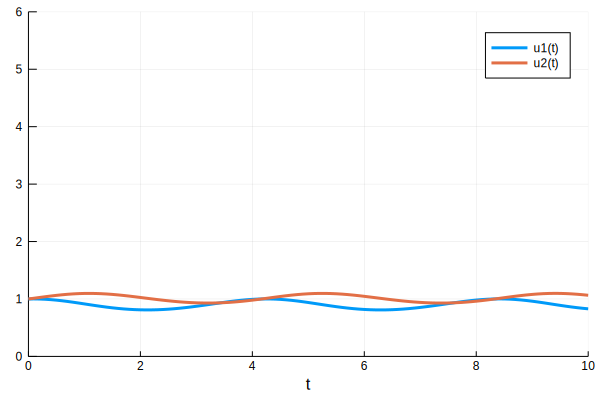

1.2342477571313268 (tracked)

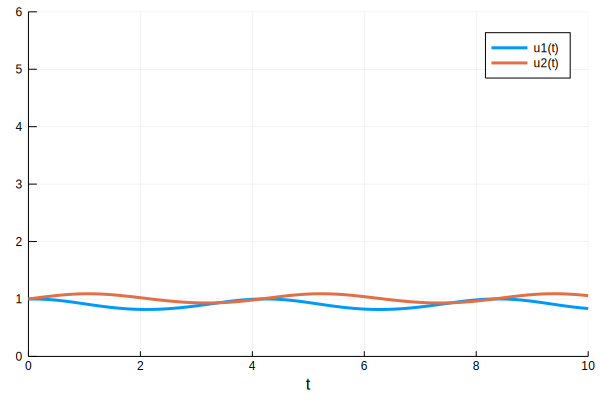

1.140234127998385 (tracked)

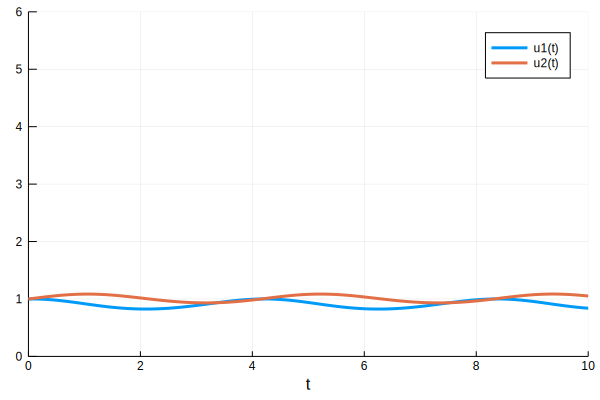

1.05180015241052 (tracked)

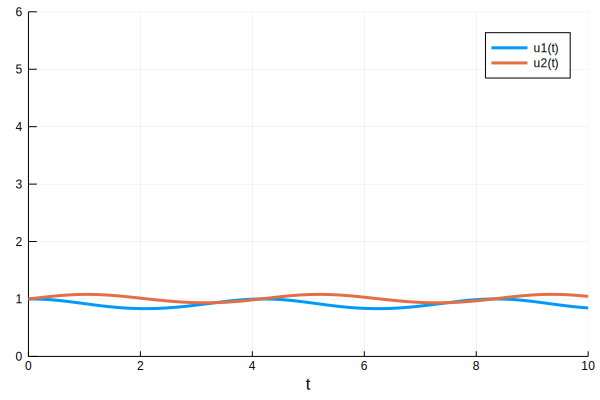

0.9686227506177011 (tracked)

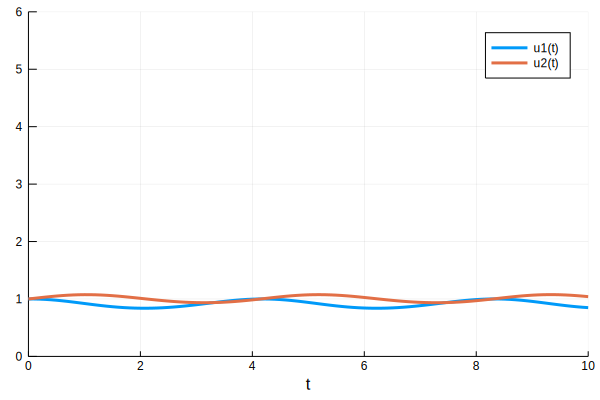

0.8904137675505509 (tracked)

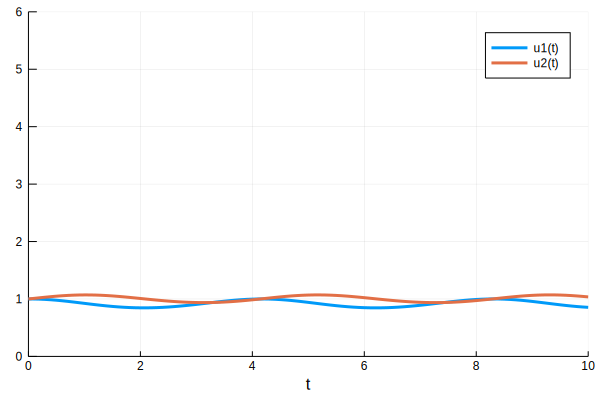

0.8169105350152632 (tracked)

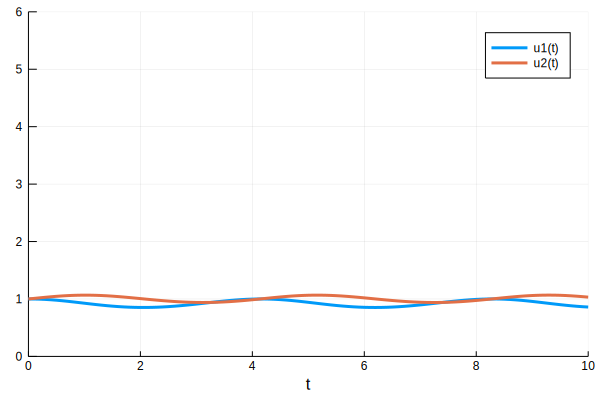

0.7478805744248508 (tracked)

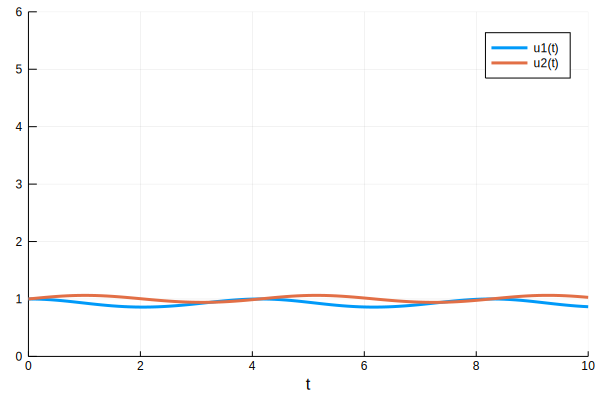

0.6831302463884533 (tracked)

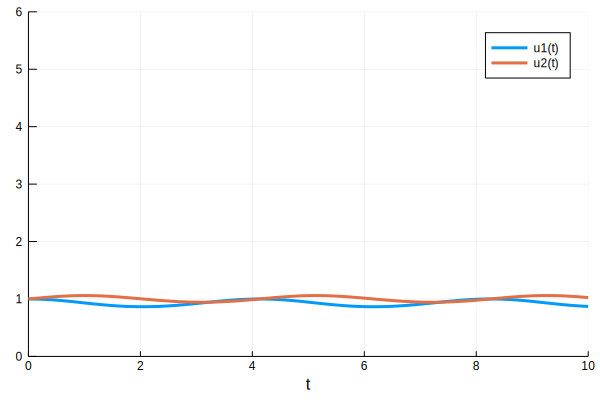

0.6224793697527868 (tracked)

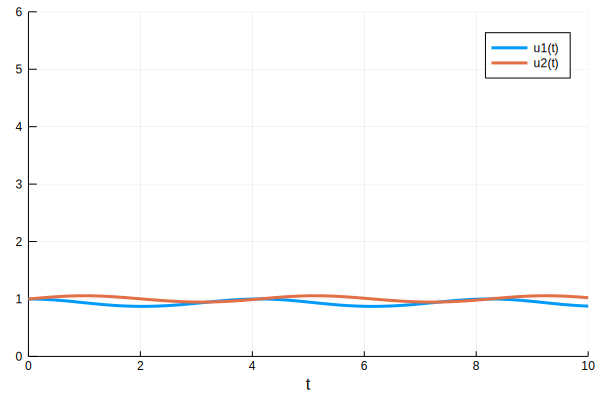

0.5657648419997027 (tracked)

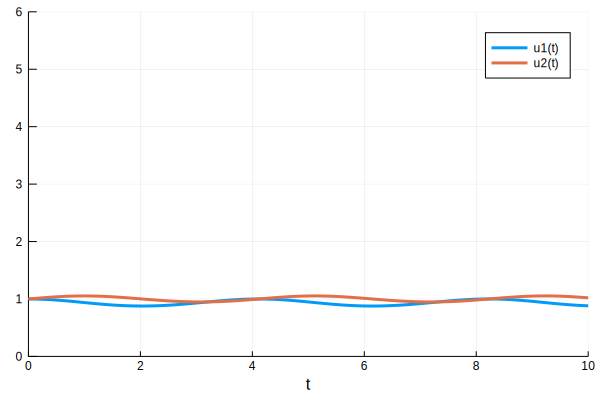

0.512845512178276 (tracked)

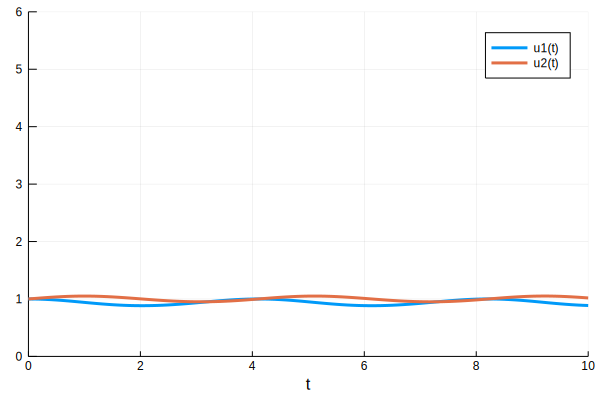

0.463583872163868 (tracked)

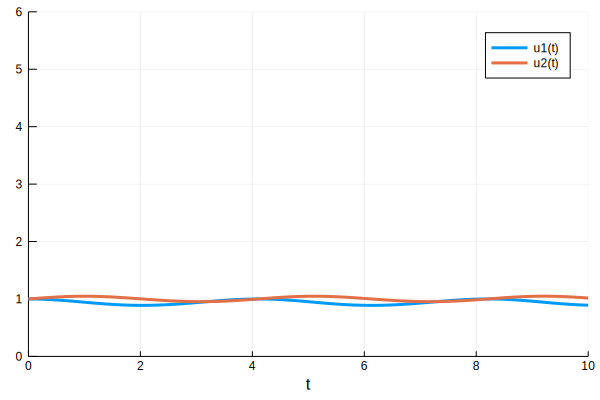

0.41785128944651356 (tracked)

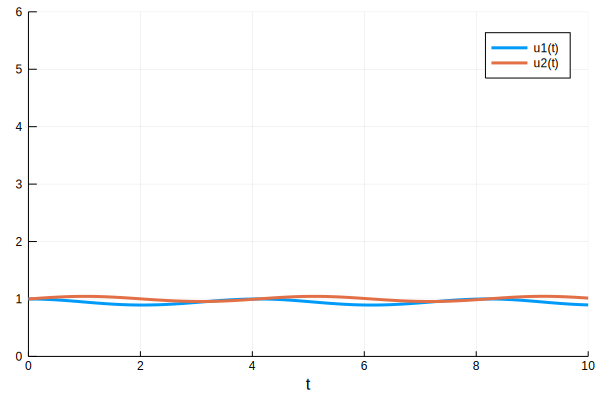

0.3755219652475226 (tracked)

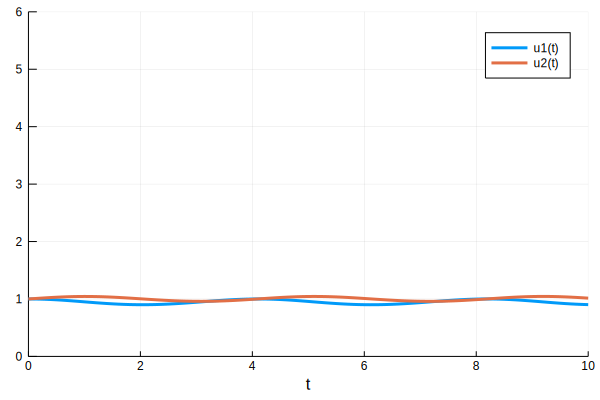

0.3364680598185519 (tracked)

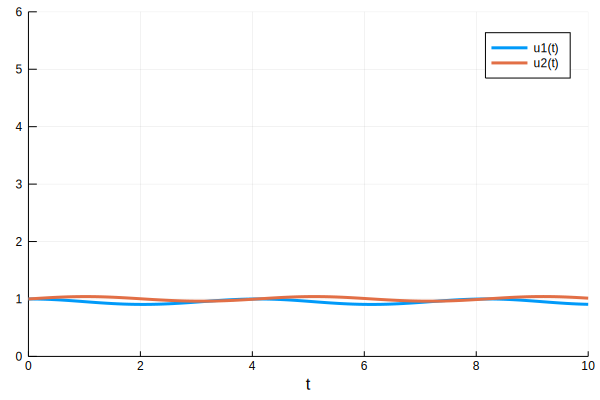

0.3005618622184043 (tracked)

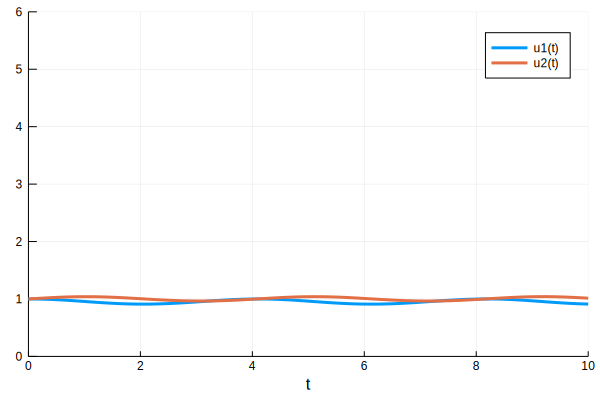

0.26766806933110887 (tracked)

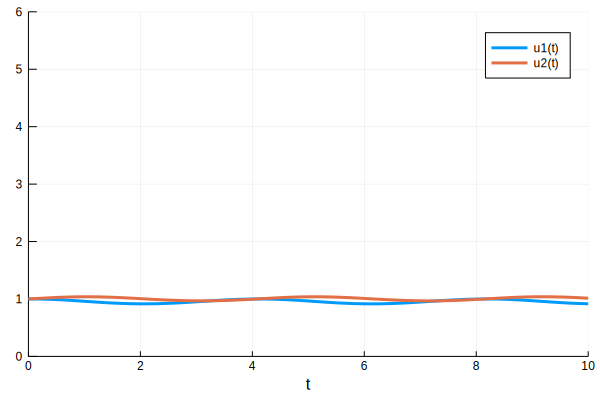

In [74]:
data = Iterators.repeated((), 100)
opt = ADAM(0.1)
cb = function () #callback function to observe training
  display(loss_rd())
  # using `remake` to re-create our `prob` with current parameters `p`
  display(plot(solve(remake(prob,p=Flux.data(p)),Tsit5(),saveat=0.1),ylim=(0,6)))
end

# Display the ODE with the initial parameter values.
cb()

Flux.train!(loss_rd, params, data, opt, cb = cb)

In [14]:
m = Chain(
  Dense(28^2, 32, relu),
  Dense(32, 10),
  softmax)


Chain(Dense(784, 32, NNlib.relu), Dense(32, 10), NNlib.softmax)

In [76]:
tspan = (0.0f0,25.0f0)
#x->neural_ode(dudt,x,tspan,Tsit5(),saveat=0.1)

(0.0f0, 25.0f0)

In [77]:
x->neural_ode(gpu(dudt),gpu(x),tspan,Tsit5(),saveat=0.1)

#59 (generic function with 1 method)

In [64]:
u0 = Float32[2.; 0.]
datasize = 30
tspan = (0.0f0,1.5f0)

function trueODEfunc(du,u,p,t)
    true_A = [-0.1 2.0; -2.0 -0.1]
    du .= ((u.^3)'true_A)'
end
t = range(tspan[1],tspan[2],length=datasize)
prob = ODEProblem(trueODEfunc,u0,tspan)
ode_data = Array(solve(prob,Tsit5(),saveat=t))

2×30 Array{Float32,2}:
 2.0  1.94651   1.74178  1.23835  0.577128  …  1.40969   1.37179   1.29075 
 0.0  0.798833  1.46473  1.80875  1.86464      0.462541  0.741123  0.984491

#51 (generic function with 1 method)

In [63]:
pred = n_ode(u0) # Get the prediction using the correct initial condition
scatter(t,ode_data[1,:],label="data")
scatter!(t,Flux.data(pred[1,:]),label="prediction")

DimensionMismatch: DimensionMismatch("dimensions must match")

In [58]:
function predict_n_ode()
  n_ode([0.0])
end
loss_n_ode() = sum(abs2,ode_data .- predict_n_ode())

loss_n_ode (generic function with 1 method)

In [42]:
data = Iterators.repeated((), 1000)
opt = ADAM(0.1)
cb = function () #callback function to observe training
  loss=loss_n_ode()
  display(loss)
  if loss < 0.1
        Flux.stop()
    end
  # plot current prediction against data
  #cur_pred = Flux.data(predict_n_ode())
  #pl = scatter(t,ode_data[1,:],label="data")
  #scatter!(pl,t,cur_pred[1,:],label="prediction")
  #display(plot(pl))
end

# Display the ODE with the initial parameter values.
cb()

Flux.train!(loss_n_ode, ps, data, opt, cb = cb)

361.7545f0 (tracked)

29.949656f0 (tracked)

40.103806f0 (tracked)

47.95813f0 (tracked)

55.44433f0 (tracked)

59.453316f0 (tracked)

62.0337f0 (tracked)

64.68914f0 (tracked)

63.81994f0 (tracked)

64.68675f0 (tracked)

63.87089f0 (tracked)

62.32004f0 (tracked)

61.006516f0 (tracked)

59.23039f0 (tracked)

58.02271f0 (tracked)

56.354023f0 (tracked)

54.486305f0 (tracked)

53.242065f0 (tracked)

51.49243f0 (tracked)

50.49072f0 (tracked)

49.353474f0 (tracked)

48.42691f0 (tracked)

47.60078f0 (tracked)

46.6453f0 (tracked)

45.855686f0 (tracked)

44.69813f0 (tracked)

43.685143f0 (tracked)

42.122265f0 (tracked)

40.663967f0 (tracked)

39.14915f0 (tracked)

45.542694f0 (tracked)

45.520126f0 (tracked)

39.764133f0 (tracked)

44.952766f0 (tracked)

49.66559f0 (tracked)

62.465485f0 (tracked)

70.27128f0 (tracked)

72.93989f0 (tracked)

80.45251f0 (tracked)

81.83826f0 (tracked)

78.17441f0 (tracked)

71.85595f0 (tracked)

70.310196f0 (tracked)

66.2275f0 (tracked)

58.723312f0 (tracked)

53.83055f0 (tracked)

50.55998f0 (tracked)

49.988605f0 (tracked)

48.902885f0 (tracked)

40.61801f0 (tracked)

32.65916f0 (tracked)

28.948906f0 (tracked)

28.38575f0 (tracked)

29.048248f0 (tracked)

30.165108f0 (tracked)

31.205696f0 (tracked)

31.30059f0 (tracked)

30.796024f0 (tracked)

30.511875f0 (tracked)

30.198805f0 (tracked)

29.554018f0 (tracked)

28.231337f0 (tracked)

26.049759f0 (tracked)

24.045782f0 (tracked)

23.07875f0 (tracked)

22.889765f0 (tracked)

22.920616f0 (tracked)

21.993822f0 (tracked)

21.083633f0 (tracked)

21.099619f0 (tracked)

21.028149f0 (tracked)

20.476622f0 (tracked)

19.696053f0 (tracked)

19.138657f0 (tracked)

18.92437f0 (tracked)

18.62528f0 (tracked)

17.952118f0 (tracked)

17.232454f0 (tracked)

16.79226f0 (tracked)

16.543673f0 (tracked)

16.20574f0 (tracked)

15.6863365f0 (tracked)

15.127058f0 (tracked)

14.7605095f0 (tracked)

14.480896f0 (tracked)

14.009811f0 (tracked)

13.705412f0 (tracked)

13.834492f0 (tracked)

13.5144825f0 (tracked)

13.093732f0 (tracked)

13.007664f0 (tracked)

12.493688f0 (tracked)

12.272612f0 (tracked)

12.170856f0 (tracked)

11.937025f0 (tracked)

11.706236f0 (tracked)

11.479763f0 (tracked)

11.202563f0 (tracked)

11.010042f0 (tracked)

10.869869f0 (tracked)

10.68308f0 (tracked)

10.463041f0 (tracked)

10.234689f0 (tracked)

9.994069f0 (tracked)

9.696488f0 (tracked)

9.021937f0 (tracked)

6.4663754f0 (tracked)

5.840363f0 (tracked)

5.98958f0 (tracked)

5.889919f0 (tracked)

5.7978806f0 (tracked)

5.389126f0 (tracked)

5.2568574f0 (tracked)

4.927924f0 (tracked)

4.6551323f0 (tracked)

4.203349f0 (tracked)

3.7816434f0 (tracked)

3.5293565f0 (tracked)

3.4166749f0 (tracked)

3.3399372f0 (tracked)

3.1771035f0 (tracked)

2.9864855f0 (tracked)

2.823589f0 (tracked)

2.6780381f0 (tracked)

2.5765848f0 (tracked)

2.483745f0 (tracked)

2.3681047f0 (tracked)

2.277893f0 (tracked)

2.2143316f0 (tracked)

2.1312642f0 (tracked)

2.070773f0 (tracked)

2.0229318f0 (tracked)

1.9728189f0 (tracked)

1.9189646f0 (tracked)

1.8453853f0 (tracked)

1.7678622f0 (tracked)

1.6964812f0 (tracked)

1.6336659f0 (tracked)

1.5959786f0 (tracked)

1.5877279f0 (tracked)

1.5890338f0 (tracked)

1.5768944f0 (tracked)

1.5390143f0 (tracked)

1.4846525f0 (tracked)

1.4382607f0 (tracked)

1.4119203f0 (tracked)

1.4001535f0 (tracked)

1.3876356f0 (tracked)

1.368027f0 (tracked)

1.349097f0 (tracked)

1.3295249f0 (tracked)

1.3059468f0 (tracked)

1.2890377f0 (tracked)

1.2784537f0 (tracked)

1.2629244f0 (tracked)

1.2450463f0 (tracked)

1.2277116f0 (tracked)

1.207473f0 (tracked)

1.1895772f0 (tracked)

1.176454f0 (tracked)

1.1649811f0 (tracked)

1.1542695f0 (tracked)

1.1433529f0 (tracked)

1.1307074f0 (tracked)

1.1175534f0 (tracked)

1.1051259f0 (tracked)

1.0936462f0 (tracked)

1.0831164f0 (tracked)

1.0731504f0 (tracked)

1.0622423f0 (tracked)

1.0509436f0 (tracked)

1.0400357f0 (tracked)

1.0293982f0 (tracked)

1.0195433f0 (tracked)

1.010661f0 (tracked)

1.0013107f0 (tracked)

0.9916874f0 (tracked)

0.98247296f0 (tracked)

0.97321594f0 (tracked)

0.96450853f0 (tracked)

0.95691425f0 (tracked)

0.94882613f0 (tracked)

0.9408865f0 (tracked)

0.9334716f0 (tracked)

0.92587686f0 (tracked)

0.9183654f0 (tracked)

0.91173494f0 (tracked)

0.9052722f0 (tracked)

0.8983005f0 (tracked)

0.89195853f0 (tracked)

0.885524f0 (tracked)

0.879006f0 (tracked)

0.87321216f0 (tracked)

0.86752975f0 (tracked)

0.86167175f0 (tracked)

0.85645026f0 (tracked)

0.85083973f0 (tracked)

0.8456951f0 (tracked)

0.8411686f0 (tracked)

0.8358056f0 (tracked)

0.8310227f0 (tracked)

0.8266369f0 (tracked)

0.8215582f0 (tracked)

0.81722575f0 (tracked)

0.8128639f0 (tracked)

0.80846524f0 (tracked)

0.8045744f0 (tracked)

0.8002943f0 (tracked)

0.79628605f0 (tracked)

0.79253715f0 (tracked)

0.788733f0 (tracked)

0.7849529f0 (tracked)

0.78154325f0 (tracked)

0.777872f0 (tracked)

0.7742756f0 (tracked)

0.77113235f0 (tracked)

0.76764846f0 (tracked)

0.7643779f0 (tracked)

0.7612513f0 (tracked)

0.7579206f0 (tracked)

0.75501317f0 (tracked)

0.7517959f0 (tracked)

0.74883014f0 (tracked)

0.74587864f0 (tracked)

0.74298537f0 (tracked)

0.74017495f0 (tracked)

0.7373299f0 (tracked)

0.73458904f0 (tracked)

0.73187196f0 (tracked)

0.72923267f0 (tracked)

0.72664416f0 (tracked)

0.7239598f0 (tracked)

0.7214023f0 (tracked)

0.71887493f0 (tracked)

0.71636254f0 (tracked)

0.71390414f0 (tracked)

0.71149254f0 (tracked)

0.7090721f0 (tracked)

0.706737f0 (tracked)

0.7043811f0 (tracked)

0.7022496f0 (tracked)

0.69982636f0 (tracked)

0.6975749f0 (tracked)

0.69529355f0 (tracked)

0.69299036f0 (tracked)

0.6908649f0 (tracked)

0.68861914f0 (tracked)

0.6864928f0 (tracked)

0.6843273f0 (tracked)

0.6822521f0 (tracked)

0.68035644f0 (tracked)

0.67807627f0 (tracked)

0.67604375f0 (tracked)

0.6740128f0 (tracked)

0.6720056f0 (tracked)

0.6699918f0 (tracked)

0.66800815f0 (tracked)

0.6660316f0 (tracked)

0.6640387f0 (tracked)

0.6620419f0 (tracked)

0.6601231f0 (tracked)

0.6581627f0 (tracked)

0.65626085f0 (tracked)

0.65437615f0 (tracked)

0.6525011f0 (tracked)

0.6506304f0 (tracked)

0.6488055f0 (tracked)

0.64694613f0 (tracked)

0.64514357f0 (tracked)

0.6433215f0 (tracked)

0.64150286f0 (tracked)

0.63972396f0 (tracked)

0.6379254f0 (tracked)

0.6361553f0 (tracked)

0.63441235f0 (tracked)

0.6326777f0 (tracked)

0.63092566f0 (tracked)

0.62927866f0 (tracked)

0.6274966f0 (tracked)

0.6258927f0 (tracked)

0.6241889f0 (tracked)

0.62242186f0 (tracked)

0.6208112f0 (tracked)

0.6190893f0 (tracked)

0.61746347f0 (tracked)

0.6158053f0 (tracked)

0.6141895f0 (tracked)

0.6125493f0 (tracked)

0.61098534f0 (tracked)

0.6093695f0 (tracked)

0.6077577f0 (tracked)

0.6062284f0 (tracked)

0.60456944f0 (tracked)

0.6030663f0 (tracked)

0.6014454f0 (tracked)

0.59993196f0 (tracked)

0.5983543f0 (tracked)

0.59687746f0 (tracked)

0.5952985f0 (tracked)

0.5937971f0 (tracked)

0.59227294f0 (tracked)

0.5907776f0 (tracked)

0.5892911f0 (tracked)

0.5878069f0 (tracked)

0.58632606f0 (tracked)

0.58485764f0 (tracked)

0.583398f0 (tracked)

0.5819575f0 (tracked)

0.58049875f0 (tracked)

0.57907516f0 (tracked)

0.57764125f0 (tracked)

0.5762858f0 (tracked)

0.5748068f0 (tracked)

0.5735064f0 (tracked)

0.57190746f0 (tracked)

0.57070374f0 (tracked)

0.56907535f0 (tracked)

0.5678075f0 (tracked)

0.5662934f0 (tracked)

0.56491417f0 (tracked)

0.5634883f0 (tracked)

0.5620561f0 (tracked)

0.5606774f0 (tracked)

0.5592603f0 (tracked)

0.55783707f0 (tracked)

0.55644655f0 (tracked)

0.55506116f0 (tracked)

0.5536465f0 (tracked)

0.5522749f0 (tracked)

0.5508209f0 (tracked)

0.5494542f0 (tracked)

0.547986f0 (tracked)

0.5466565f0 (tracked)

0.5451827f0 (tracked)

0.5439068f0 (tracked)

0.54232866f0 (tracked)

0.54085946f0 (tracked)

0.53935677f0 (tracked)

0.53790027f0 (tracked)

0.5363917f0 (tracked)

0.53488344f0 (tracked)

0.5333884f0 (tracked)

0.53185433f0 (tracked)

0.5303039f0 (tracked)

0.52875805f0 (tracked)

0.5271168f0 (tracked)

0.5255203f0 (tracked)

0.52384675f0 (tracked)

0.5222291f0 (tracked)

0.52044594f0 (tracked)

0.5186483f0 (tracked)

0.5168838f0 (tracked)

0.51499f0 (tracked)

0.5131215f0 (tracked)

0.5111553f0 (tracked)

0.5091994f0 (tracked)

0.5072133f0 (tracked)

0.5051007f0 (tracked)

0.5031312f0 (tracked)

0.5008316f0 (tracked)

0.49877578f0 (tracked)

0.49651203f0 (tracked)

0.4940093f0 (tracked)

0.49172282f0 (tracked)

0.48908362f0 (tracked)

0.48652405f0 (tracked)

0.48388323f0 (tracked)

0.48117626f0 (tracked)

0.4783134f0 (tracked)

0.4754793f0 (tracked)

0.4724296f0 (tracked)

0.46926692f0 (tracked)

0.46601823f0 (tracked)

0.4626421f0 (tracked)

0.45899698f0 (tracked)

0.45521796f0 (tracked)

0.45123905f0 (tracked)

0.44696984f0 (tracked)

0.44250846f0 (tracked)

0.43761128f0 (tracked)

0.43241245f0 (tracked)

0.42673486f0 (tracked)

0.42049664f0 (tracked)

0.41352344f0 (tracked)

0.4059145f0 (tracked)

0.3974051f0 (tracked)

0.3879346f0 (tracked)

0.37724093f0 (tracked)

0.365191f0 (tracked)

0.35177666f0 (tracked)

0.33688244f0 (tracked)

0.32076448f0 (tracked)

0.30416197f0 (tracked)

0.28733462f0 (tracked)

0.2740965f0 (tracked)

0.27124664f0 (tracked)

0.31756568f0 (tracked)

0.49420658f0 (tracked)

0.9994543f0 (tracked)

0.7327484f0 (tracked)

0.2574123f0 (tracked)

0.44085124f0 (tracked)

0.286326f0 (tracked)

0.32907104f0 (tracked)

0.31226504f0 (tracked)

0.31500134f0 (tracked)

0.29804638f0 (tracked)

0.24662896f0 (tracked)

0.26487404f0 (tracked)

0.26791957f0 (tracked)

0.2608119f0 (tracked)

0.19459562f0 (tracked)

0.24239889f0 (tracked)

0.20184752f0 (tracked)

0.2405638f0 (tracked)

0.15581845f0 (tracked)

0.23783788f0 (tracked)

0.14223109f0 (tracked)

0.1964998f0 (tracked)

0.14485078f0 (tracked)

0.16789906f0 (tracked)

0.12851408f0 (tracked)

0.14711085f0 (tracked)

0.14059485f0 (tracked)

0.12232831f0 (tracked)

0.13679019f0 (tracked)

0.11610403f0 (tracked)

0.13141163f0 (tracked)

0.10759776f0 (tracked)

0.12394468f0 (tracked)

0.102906026f0 (tracked)

0.112919524f0 (tracked)

0.105357975f0 (tracked)

0.103998534f0 (tracked)

0.1026307f0 (tracked)

0.09801925f0 (tracked)

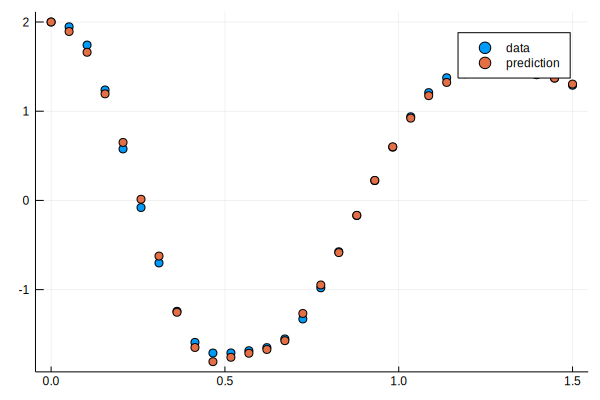

In [43]:
disp_fit = function () #callback function to observe training
  # plot current prediction against data
  cur_pred = Flux.data(predict_n_ode())
  pl = scatter(t,ode_data[1,:],label="data")
  scatter!(pl,t,cur_pred[1,:],label="prediction")
  display(plot(pl))
end
disp_fit()

In [48]:
display("network")
display(dudt)
display("parametrization")
display(ps)

"network"

Chain(getfield(Main, Symbol("##29#30"))(), Dense(2, 50, tanh), Dense(50, 2))

"parametrization"

Params([Float32[0.179085 1.24691; -0.817681 -1.0975; … ; -0.597144 0.607233; 0.11111 2.65303] (tracked), Float32[-1.97406, 3.58455, 3.41981, -0.755386, -1.11968, 0.115748, -0.0705404, -1.2469, 0.670489, -0.824884  …  -1.93927, -2.227, 0.58189, 1.87963, -1.9357, -1.03849, -3.91898, -1.1932, 2.23395, -0.61419] (tracked), Float32[0.0303017 0.118214 … 0.0977715 1.031; 0.905109 -0.907409 … -1.8664 0.894115] (tracked), Float32[0.494247, 0.41747] (tracked)])

In [52]:
dsdt = Chain(Dense(2,50,tanh),
             Dense(50,2))

ps = Flux.params(dsdt)
n_ode = x->neural_ode(gpu(dsdt),gpu(x),tspan,Tsit5(),saveat=t,reltol=1e-7,abstol=1e-9)

#45 (generic function with 1 method)

In [53]:
cb()

Flux.train!(loss_n_ode, ps, data, opt, cb = cb)

183.53636f0 (tracked)

126.232765f0 (tracked)

109.22299f0 (tracked)

106.806015f0 (tracked)

99.23041f0 (tracked)

93.36935f0 (tracked)

89.649376f0 (tracked)

87.292404f0 (tracked)

85.688385f0 (tracked)

84.47642f0 (tracked)

83.4482f0 (tracked)

82.443825f0 (tracked)

81.379166f0 (tracked)

80.27039f0 (tracked)

79.09604f0 (tracked)

78.01607f0 (tracked)

76.77457f0 (tracked)

75.412865f0 (tracked)

73.721375f0 (tracked)

71.6616f0 (tracked)

69.22918f0 (tracked)

66.32508f0 (tracked)

62.352135f0 (tracked)

55.744995f0 (tracked)

46.12675f0 (tracked)

33.499027f0 (tracked)

35.848076f0 (tracked)

55.688984f0 (tracked)

72.502106f0 (tracked)

73.63626f0 (tracked)

71.54115f0 (tracked)

66.55475f0 (tracked)

58.74311f0 (tracked)

47.438953f0 (tracked)

34.491783f0 (tracked)

45.441845f0 (tracked)

48.682487f0 (tracked)

34.46018f0 (tracked)

38.484955f0 (tracked)

42.305126f0 (tracked)

41.746693f0 (tracked)

35.944176f0 (tracked)

25.164692f0 (tracked)

34.628757f0 (tracked)

17.984255f0 (tracked)

20.978916f0 (tracked)

17.929955f0 (tracked)

12.258293f0 (tracked)

15.359869f0 (tracked)

15.417059f0 (tracked)

11.286024f0 (tracked)

24.695927f0 (tracked)

8.717562f0 (tracked)

14.91612f0 (tracked)

8.031142f0 (tracked)

12.950242f0 (tracked)

5.5997696f0 (tracked)

11.970219f0 (tracked)

5.2256684f0 (tracked)

11.334668f0 (tracked)

4.865106f0 (tracked)

8.494369f0 (tracked)

3.8181336f0 (tracked)

6.6016226f0 (tracked)

3.5732772f0 (tracked)

5.607914f0 (tracked)

3.4934845f0 (tracked)

4.550718f0 (tracked)

3.5342557f0 (tracked)

3.9772105f0 (tracked)

2.9002864f0 (tracked)

3.7807052f0 (tracked)

2.4735272f0 (tracked)

3.2383971f0 (tracked)

2.0899594f0 (tracked)

2.8457634f0 (tracked)

2.309662f0 (tracked)

2.5883877f0 (tracked)

2.3781059f0 (tracked)

2.2544827f0 (tracked)

2.2629836f0 (tracked)

1.8960395f0 (tracked)

2.09676f0 (tracked)

1.8198051f0 (tracked)

1.9947861f0 (tracked)

1.7582104f0 (tracked)

1.8359253f0 (tracked)

1.7036104f0 (tracked)

1.7075443f0 (tracked)

1.625557f0 (tracked)

1.6045756f0 (tracked)

1.5775143f0 (tracked)

1.5301204f0 (tracked)

1.525732f0 (tracked)

1.4596102f0 (tracked)

1.4937525f0 (tracked)

1.4054182f0 (tracked)

1.4517878f0 (tracked)

1.3499541f0 (tracked)

1.4142296f0 (tracked)

1.3240273f0 (tracked)

1.3827014f0 (tracked)

1.2918663f0 (tracked)

1.3286805f0 (tracked)

1.2533615f0 (tracked)

1.282306f0 (tracked)

1.2372777f0 (tracked)

1.2492975f0 (tracked)

1.2243515f0 (tracked)

1.2103387f0 (tracked)

1.2001344f0 (tracked)

1.1728064f0 (tracked)

1.176328f0 (tracked)

1.1470424f0 (tracked)

1.1560367f0 (tracked)

1.1278408f0 (tracked)

1.1338474f0 (tracked)

1.1102151f0 (tracked)

1.1097287f0 (tracked)

1.0938022f0 (tracked)

1.0866382f0 (tracked)

1.0789496f0 (tracked)

1.066909f0 (tracked)

1.0640539f0 (tracked)

1.049053f0 (tracked)

1.0470701f0 (tracked)

1.033102f0 (tracked)

1.0300643f0 (tracked)

1.020236f0 (tracked)

1.0138214f0 (tracked)

1.0073725f0 (tracked)

0.9977225f0 (tracked)

0.99359083f0 (tracked)

0.9841226f0 (tracked)

0.9803719f0 (tracked)

0.9726442f0 (tracked)

0.9668901f0 (tracked)

0.96098864f0 (tracked)

0.95363736f0 (tracked)

0.94923407f0 (tracked)

0.9420953f0 (tracked)

0.9375447f0 (tracked)

0.93167704f0 (tracked)

0.92600185f0 (tracked)

0.92134506f0 (tracked)

0.91524214f0 (tracked)

0.9108556f0 (tracked)

0.905457f0 (tracked)

0.90056807f0 (tracked)

0.8961203f0 (tracked)

0.89088804f0 (tracked)

0.88667333f0 (tracked)

0.88184696f0 (tracked)

0.8773413f0 (tracked)

0.873171f0 (tracked)

0.8685112f0 (tracked)

0.86445385f0 (tracked)

0.86010677f0 (tracked)

0.85584867f0 (tracked)

0.85194737f0 (tracked)

0.84773785f0 (tracked)

0.8438567f0 (tracked)

0.83993477f0 (tracked)

0.83592176f0 (tracked)

0.8322116f0 (tracked)

0.8283686f0 (tracked)

0.8246398f0 (tracked)

0.82103515f0 (tracked)

0.81731147f0 (tracked)

0.8137576f0 (tracked)

0.81021804f0 (tracked)

0.80665493f0 (tracked)

0.8032412f0 (tracked)

0.79978955f0 (tracked)

0.79637283f0 (tracked)

0.79305464f0 (tracked)

0.7896984f0 (tracked)

0.78641117f0 (tracked)

0.7831777f0 (tracked)

0.77992696f0 (tracked)

0.7767441f0 (tracked)

0.7735883f0 (tracked)

0.77043325f0 (tracked)

0.7673413f0 (tracked)

0.76426524f0 (tracked)

0.76120114f0 (tracked)

0.7581851f0 (tracked)

0.7551767f0 (tracked)

0.75219154f0 (tracked)

0.74924695f0 (tracked)

0.7463106f0 (tracked)

0.7433968f0 (tracked)

0.7405172f0 (tracked)

0.7376449f0 (tracked)

0.73479605f0 (tracked)

0.7319742f0 (tracked)

0.7291663f0 (tracked)

0.7263755f0 (tracked)

0.72360915f0 (tracked)

0.72085416f0 (tracked)

0.7181194f0 (tracked)

0.715404f0 (tracked)

0.7127052f0 (tracked)

0.71001625f0 (tracked)

0.7073494f0 (tracked)

0.70469606f0 (tracked)

0.7020577f0 (tracked)

0.69943583f0 (tracked)

0.6968272f0 (tracked)

0.6942303f0 (tracked)

0.69164926f0 (tracked)

0.6890822f0 (tracked)

0.6865262f0 (tracked)

0.68398654f0 (tracked)

0.6814577f0 (tracked)

0.67893964f0 (tracked)

0.6764349f0 (tracked)

0.67394406f0 (tracked)

0.67146283f0 (tracked)

0.668995f0 (tracked)

0.6665358f0 (tracked)

0.664089f0 (tracked)

0.66165125f0 (tracked)

0.659227f0 (tracked)

0.65681237f0 (tracked)

0.654408f0 (tracked)

0.65201366f0 (tracked)

0.6496279f0 (tracked)

0.647254f0 (tracked)

0.6448892f0 (tracked)

0.6425345f0 (tracked)

0.64018863f0 (tracked)

0.6378517f0 (tracked)

0.63552487f0 (tracked)

0.6332056f0 (tracked)

0.6308947f0 (tracked)

0.6285948f0 (tracked)

0.6263023f0 (tracked)

0.6240175f0 (tracked)

0.6217433f0 (tracked)

0.6194764f0 (tracked)

0.61721516f0 (tracked)

0.61496514f0 (tracked)

0.6127222f0 (tracked)

0.61048657f0 (tracked)

0.60826033f0 (tracked)

0.60603994f0 (tracked)

0.6038296f0 (tracked)

0.60162455f0 (tracked)

0.59942824f0 (tracked)

0.59723914f0 (tracked)

0.5950551f0 (tracked)

0.5928819f0 (tracked)

0.5907133f0 (tracked)

0.5885539f0 (tracked)

0.5863988f0 (tracked)

0.5842544f0 (tracked)

0.5821141f0 (tracked)

0.5799808f0 (tracked)

0.5778561f0 (tracked)

0.57573587f0 (tracked)

0.5736229f0 (tracked)

0.57151675f0 (tracked)

0.56941843f0 (tracked)

0.567325f0 (tracked)

0.5652395f0 (tracked)

0.5631588f0 (tracked)

0.5610873f0 (tracked)

0.55901885f0 (tracked)

0.556959f0 (tracked)

0.55490404f0 (tracked)

0.5528559f0 (tracked)

0.55081296f0 (tracked)

0.54877746f0 (tracked)

0.5467467f0 (tracked)

0.5447233f0 (tracked)

0.5427056f0 (tracked)

0.5406947f0 (tracked)

0.5386881f0 (tracked)

0.53668827f0 (tracked)

0.5346923f0 (tracked)

0.5327054f0 (tracked)

0.5307227f0 (tracked)

0.5287465f0 (tracked)

0.52677447f0 (tracked)

0.5248105f0 (tracked)

0.52285075f0 (tracked)

0.5208958f0 (tracked)

0.51894706f0 (tracked)

0.5170065f0 (tracked)

0.5150682f0 (tracked)

0.51313525f0 (tracked)

0.5112085f0 (tracked)

0.5092884f0 (tracked)

0.50737405f0 (tracked)

0.5054634f0 (tracked)

0.5035603f0 (tracked)

0.5016593f0 (tracked)

0.49976614f0 (tracked)

0.4978786f0 (tracked)

0.49599376f0 (tracked)

0.49411705f0 (tracked)

0.49224415f0 (tracked)

0.4903774f0 (tracked)

0.4885144f0 (tracked)

0.48665804f0 (tracked)

0.4848066f0 (tracked)

0.48296115f0 (tracked)

0.4811187f0 (tracked)

0.47928214f0 (tracked)

0.4774494f0 (tracked)

0.47562364f0 (tracked)

0.47380358f0 (tracked)

0.47198683f0 (tracked)

0.47017583f0 (tracked)

0.46836874f0 (tracked)

0.46656695f0 (tracked)

0.46477172f0 (tracked)

0.4629797f0 (tracked)

0.46119452f0 (tracked)

0.459413f0 (tracked)

0.45763564f0 (tracked)

0.45586404f0 (tracked)

0.45409808f0 (tracked)

0.45233318f0 (tracked)

0.45057675f0 (tracked)

0.44882637f0 (tracked)

0.44707745f0 (tracked)

0.44533414f0 (tracked)

0.4435974f0 (tracked)

0.44186363f0 (tracked)

0.44013304f0 (tracked)

0.4384087f0 (tracked)

0.43669003f0 (tracked)

0.4349746f0 (tracked)

0.43326396f0 (tracked)

0.43155771f0 (tracked)

0.4298569f0 (tracked)

0.42816156f0 (tracked)

0.42646977f0 (tracked)

0.42478105f0 (tracked)

0.42309955f0 (tracked)

0.42142156f0 (tracked)

0.4197472f0 (tracked)

0.41807872f0 (tracked)

0.41641364f0 (tracked)

0.41475344f0 (tracked)

0.41309908f0 (tracked)

0.41144684f0 (tracked)

0.4097995f0 (tracked)

0.40815675f0 (tracked)

0.4065195f0 (tracked)

0.40488613f0 (tracked)

0.4032585f0 (tracked)

0.40163222f0 (tracked)

0.40001145f0 (tracked)

0.39839548f0 (tracked)

0.39678466f0 (tracked)

0.39517716f0 (tracked)

0.39357352f0 (tracked)

0.3919741f0 (tracked)

0.39038113f0 (tracked)

0.3887915f0 (tracked)

0.3872057f0 (tracked)

0.38562417f0 (tracked)

0.3840456f0 (tracked)

0.38247287f0 (tracked)

0.3809041f0 (tracked)

0.37933952f0 (tracked)

0.37777844f0 (tracked)

0.37622193f0 (tracked)

0.37467107f0 (tracked)

0.3731216f0 (tracked)

0.3715785f0 (tracked)

0.37003958f0 (tracked)

0.36850426f0 (tracked)

0.36697176f0 (tracked)

0.36544532f0 (tracked)

0.36392194f0 (tracked)

0.36240348f0 (tracked)

0.36088854f0 (tracked)

0.3593781f0 (tracked)

0.3578711f0 (tracked)

0.35636973f0 (tracked)

0.35486993f0 (tracked)

0.35337573f0 (tracked)

0.35188627f0 (tracked)

0.3504004f0 (tracked)

0.34891745f0 (tracked)

0.34743905f0 (tracked)

0.3459643f0 (tracked)

0.34449506f0 (tracked)

0.34302828f0 (tracked)

0.34156644f0 (tracked)

0.34010798f0 (tracked)

0.33865482f0 (tracked)

0.33720276f0 (tracked)

0.33575746f0 (tracked)

0.3343151f0 (tracked)

0.33287606f0 (tracked)

0.3314423f0 (tracked)

0.33001205f0 (tracked)

0.3285851f0 (tracked)

0.3271623f0 (tracked)

0.32574445f0 (tracked)

0.3243296f0 (tracked)

0.32291883f0 (tracked)

0.3215124f0 (tracked)

0.32010928f0 (tracked)

0.31871077f0 (tracked)

0.31731525f0 (tracked)

0.31592357f0 (tracked)

0.314535f0 (tracked)

0.3131523f0 (tracked)

0.31177303f0 (tracked)

0.31039765f0 (tracked)

0.30902454f0 (tracked)

0.30765763f0 (tracked)

0.30629343f0 (tracked)

0.30493268f0 (tracked)

0.3035767f0 (tracked)

0.30222374f0 (tracked)

0.30087608f0 (tracked)

0.29953048f0 (tracked)

0.298191f0 (tracked)

0.29685098f0 (tracked)

0.2955187f0 (tracked)

0.29418913f0 (tracked)

0.29286194f0 (tracked)

0.291541f0 (tracked)

0.29022345f0 (tracked)

0.28890836f0 (tracked)

0.28759775f0 (tracked)

0.28629097f0 (tracked)

0.28498816f0 (tracked)

0.28368893f0 (tracked)

0.28239265f0 (tracked)

0.28110224f0 (tracked)

0.2798138f0 (tracked)

0.27853036f0 (tracked)

0.2772499f0 (tracked)

0.27597323f0 (tracked)

0.27470213f0 (tracked)

0.27343273f0 (tracked)

0.27216804f0 (tracked)

0.2709086f0 (tracked)

0.26965055f0 (tracked)

0.26839948f0 (tracked)

0.2671552f0 (tracked)

0.2659169f0 (tracked)

0.2646888f0 (tracked)

0.26347786f0 (tracked)

0.26229388f0 (tracked)

0.2611559f0 (tracked)

0.26010373f0 (tracked)

0.25921184f0 (tracked)

0.258625f0 (tracked)

0.2586488f0 (tracked)

0.25983366f0 (tracked)

0.263475f0 (tracked)

0.2716877f0 (tracked)

0.29022112f0 (tracked)

0.3265665f0 (tracked)

0.40673575f0 (tracked)

0.54554945f0 (tracked)

0.84500885f0 (tracked)

1.1841917f0 (tracked)

1.7303582f0 (tracked)

1.4708371f0 (tracked)

0.8816805f0 (tracked)

0.27805713f0 (tracked)

0.53103876f0 (tracked)

1.4054215f0 (tracked)

2.101711f0 (tracked)

1.9997203f0 (tracked)

0.5123297f0 (tracked)

1.8161091f0 (tracked)

4.194591f0 (tracked)

2.6393027f0 (tracked)

1.1780877f0 (tracked)

1.9328753f0 (tracked)

0.7637557f0 (tracked)

0.838741f0 (tracked)

1.4831434f0 (tracked)

1.2765293f0 (tracked)

1.0701572f0 (tracked)

1.01855f0 (tracked)

0.5069818f0 (tracked)

0.97860044f0 (tracked)

1.0360335f0 (tracked)

0.704762f0 (tracked)

1.018571f0 (tracked)

0.57612514f0 (tracked)

0.47594556f0 (tracked)

1.0021431f0 (tracked)

0.7629788f0 (tracked)

0.5719893f0 (tracked)

0.83737314f0 (tracked)

0.37294343f0 (tracked)

0.52272743f0 (tracked)

0.77653706f0 (tracked)

0.4344547f0 (tracked)

0.52796984f0 (tracked)

0.532843f0 (tracked)

0.27308652f0 (tracked)

0.5029241f0 (tracked)

0.47589454f0 (tracked)

0.29320225f0 (tracked)

0.45436057f0 (tracked)

0.298654f0 (tracked)

0.28179526f0 (tracked)

0.4221089f0 (tracked)

0.2753908f0 (tracked)

0.28812027f0 (tracked)

0.33821324f0 (tracked)

0.21286783f0 (tracked)

0.29984298f0 (tracked)

0.2990817f0 (tracked)

0.21179777f0 (tracked)

0.28274056f0 (tracked)

0.23932378f0 (tracked)

0.20938052f0 (tracked)

0.27122676f0 (tracked)

0.21944165f0 (tracked)

0.21041882f0 (tracked)

0.24348886f0 (tracked)

0.19669434f0 (tracked)

0.2120828f0 (tracked)

0.226878f0 (tracked)

0.19084477f0 (tracked)

0.20698377f0 (tracked)

0.20760177f0 (tracked)

0.18505462f0 (tracked)

0.20227595f0 (tracked)

0.19688986f0 (tracked)

0.18295315f0 (tracked)

0.19488293f0 (tracked)

0.1866964f0 (tracked)

0.18028739f0 (tracked)

0.18854949f0 (tracked)

0.18106474f0 (tracked)

0.17777112f0 (tracked)

0.18204455f0 (tracked)

0.17593986f0 (tracked)

0.17471299f0 (tracked)

0.17678607f0 (tracked)

0.17252219f0 (tracked)

0.17149103f0 (tracked)

0.17217124f0 (tracked)

0.16923535f0 (tracked)

0.1680934f0 (tracked)

0.16833569f0 (tracked)

0.16630521f0 (tracked)

0.16486089f0 (tracked)

0.16502881f0 (tracked)

0.16335292f0 (tracked)

0.16173618f0 (tracked)

0.16199283f0 (tracked)

0.16044593f0 (tracked)

0.15891977f0 (tracked)

0.15917647f0 (tracked)

0.15760899f0 (tracked)

0.15624851f0 (tracked)

0.15637952f0 (tracked)

0.15486513f0 (tracked)

0.15375355f0 (tracked)

0.15365753f0 (tracked)

0.1522703f0 (tracked)

0.15131788f0 (tracked)

0.15096124f0 (tracked)

0.14977714f0 (tracked)

0.1489106f0 (tracked)

0.14835349f0 (tracked)

0.14738546f0 (tracked)

0.14651607f0 (tracked)

0.14583439f0 (tracked)

0.14503752f0 (tracked)

0.14413725f0 (tracked)

0.14341058f0 (tracked)

0.14271048f0 (tracked)

0.14179534f0 (tracked)

0.14106973f0 (tracked)

0.14039686f0 (tracked)

0.13950247f0 (tracked)

0.13878162f0 (tracked)

0.13809909f0 (tracked)

0.13725913f0 (tracked)

0.13653424f0 (tracked)

0.13583273f0 (tracked)

0.13505697f0 (tracked)

0.13431673f0 (tracked)

0.13360795f0 (tracked)

0.13288291f0 (tracked)

0.13213225f0 (tracked)

0.1314258f0 (tracked)

0.13072969f0 (tracked)

0.12998445f0 (tracked)

0.12928444f0 (tracked)

0.12859794f0 (tracked)

0.12787153f0 (tracked)

0.12717667f0 (tracked)

0.12649222f0 (tracked)

0.12579207f0 (tracked)

0.12510003f0 (tracked)

0.12441809f0 (tracked)

0.1237407f0 (tracked)

0.12305272f0 (tracked)

0.122378156f0 (tracked)

0.12171394f0 (tracked)

0.121036544f0 (tracked)

0.12037054f0 (tracked)

0.11971291f0 (tracked)

0.119050935f0 (tracked)

0.118392415f0 (tracked)

0.11774114f0 (tracked)

0.117092825f0 (tracked)

0.11644324f0 (tracked)

0.11579871f0 (tracked)

0.1151618f0 (tracked)

0.11452287f0 (tracked)

0.11388746f0 (tracked)

0.11325805f0 (tracked)

0.11262989f0 (tracked)

0.112004355f0 (tracked)

0.11138183f0 (tracked)

0.110764295f0 (tracked)

0.110148355f0 (tracked)

0.109535374f0 (tracked)

0.10892625f0 (tracked)

0.108320154f0 (tracked)

0.10771576f0 (tracked)

0.10711568f0 (tracked)

0.10651876f0 (tracked)

0.10592439f0 (tracked)

0.105332084f0 (tracked)

0.104744665f0 (tracked)

0.10415952f0 (tracked)

0.10357625f0 (tracked)

0.102997094f0 (tracked)

0.10242031f0 (tracked)

0.10184788f0 (tracked)

0.10127701f0 (tracked)

0.10070895f0 (tracked)

0.10014488f0 (tracked)

0.099583104f0 (tracked)

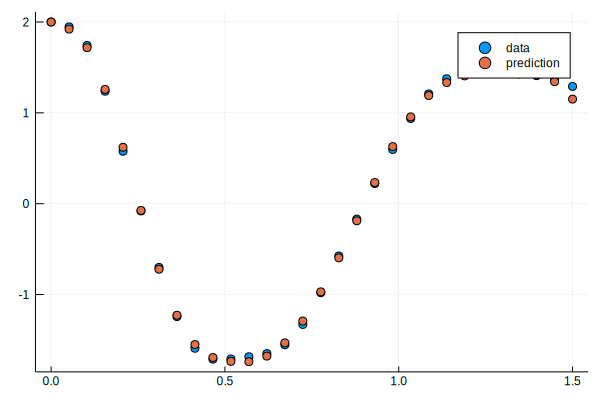

In [54]:
disp_fit()

In [55]:
dsdt = Chain(Dense(2,6,tanh),
             Dense(6,2))

ps = Flux.params(dsdt)
n_ode = x->neural_ode(gpu(dsdt),gpu(x),tspan,Tsit5(),saveat=t,reltol=1e-7,abstol=1e-9)

#47 (generic function with 1 method)